# Problem Statement (Customer Churn Prediction)
The telecom industry is highly competitive, and customer churn is a significant concern. Retaining existing customers is often more cost-effective than acquiring new ones.The primary objective is to develop a machine learning model that can predict customer churn with high accuracy. The model will use historical data to identify patterns or characteristics of customers who have churned in the past.
 
# Data Dictionary

1) customerID: Unique identifier for each customer
2) gender: Gender of the customer (Male/Female)
3) SeniorCitizen: Whether the customer is a senior citizen or not (1 for Yes, 0 for No)
4) Partner: Whether the customer has a partner (Yes/No)
5) Dependents: Whether the customer has dependents (Yes/No)
6) tenure: Number of months the customer has been with the company
7) PhoneService: Whether the customer has a phone service (Yes/No)
8) MultipleLines: Whether the customer has multiple lines (Yes/No/No phone service)
9) InternetService: Type of internet service the customer has (DSL, Fiber optic, No)
10) OnlineSecurity: Whether the customer has online security feature (Yes/No/No internet service)
11) OnlineBackup: Whether the customer has online backup feature (Yes/No/No internet service)
12) DeviceProtection: Whether the customer has device protection feature (Yes/No/No internet service)
13) TechSupport: Whether the customer has tech support feature (Yes/No/No internet service)
14) StreamingTV: Whether the customer has streaming TV feature (Yes/No/No internet service)
15) StreamingMovies: Whether the customer has streaming movies feature (Yes/No/No internet service)
16) Contract: Type of contract the customer has (Month-to-month, One year, Two year)
17) PaperlessBilling: Whether the customer has opted for paperless billing (Yes/No)
18) PaymentMethod: Method of payment (Electronic check, Mailed check, Bank transfer, Credit card)
19) MonthlyCharges: Monthly charges for the customer
20) TotalCharges: Total charges for the customer till date
21) Churn: Whether the customer churned or not (Yes is 1/No is 0)

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn import metrics
import matplotlib.pyplot as plt
import matplotlib.style
sns.set(color_codes = True)
%matplotlib inline


# Importing data

In [2]:
# reading the CSV file into pandas dataframe
df = pd.read_csv('train.csv') 

# DATA PROCESSING

In [3]:
# Check top few records to get a feel of the data structure
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,3704-IEAXF,Female,0,Yes,Yes,72,No,No phone service,DSL,No,...,No,Yes,Yes,Yes,Two year,No,Credit card (automatic),53.65,3784,0
1,5175-AOBHI,Female,0,No,No,4,Yes,No,DSL,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,46.00,193.6,1
2,6922-NCEDI,Male,0,No,Yes,56,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,21.20,1238.65,0
3,3143-ILDAL,Male,0,No,No,56,Yes,Yes,Fiber optic,No,...,No,Yes,No,Yes,Month-to-month,Yes,Electronic check,94.45,5124.6,1
4,0872-NXJYS,Female,0,No,No,9,Yes,No,Fiber optic,No,...,No,No,No,Yes,Month-to-month,Yes,Electronic check,79.55,723.4,1


In [4]:
df.shape

(5282, 21)

In [4]:
df.columns.values

array(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges',
       'TotalCharges', 'Churn'], dtype=object)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5282 entries, 0 to 5281
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        5282 non-null   object 
 1   gender            5282 non-null   object 
 2   SeniorCitizen     5282 non-null   int64  
 3   Partner           5282 non-null   object 
 4   Dependents        5282 non-null   object 
 5   tenure            5282 non-null   int64  
 6   PhoneService      5282 non-null   object 
 7   MultipleLines     5282 non-null   object 
 8   InternetService   5282 non-null   object 
 9   OnlineSecurity    5282 non-null   object 
 10  OnlineBackup      5282 non-null   object 
 11  DeviceProtection  5282 non-null   object 
 12  TechSupport       5282 non-null   object 
 13  StreamingTV       5282 non-null   object 
 14  StreamingMovies   5282 non-null   object 
 15  Contract          5282 non-null   object 
 16  PaperlessBilling  5282 non-null   object 


#### TotalCharges should be a float but is in object 

In [6]:
df.describe(include="all")

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
count,5282,5282,5282.000000,5282,5282,5282.000000,5282,5282,5282,5282,...,5282,5282,5282,5282,5282,5282,5282,5282.000000,5282,5282.000000
unique,5282,2,NaN,2,2,NaN,2,3,3,3,...,3,3,3,3,3,2,4,NaN,4959,NaN
top,3704-IEAXF,Male,NaN,No,No,NaN,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,NaN,20.2,NaN
freq,1,2657,NaN,2749,3713,NaN,4752,2519,2323,2618,...,2305,2585,2076,2077,2907,3132,1772,NaN,9,NaN
mean,NaN,NaN,0.162060,NaN,NaN,32.362931,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,64.856626,NaN,0.265430
std,NaN,NaN,0.368541,NaN,NaN,24.627623,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,30.171934,NaN,0.441604
min,NaN,NaN,0.000000,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18.400000,NaN,0.000000
25%,NaN,NaN,0.000000,NaN,NaN,9.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,35.450000,NaN,0.000000
50%,NaN,NaN,0.000000,NaN,NaN,29.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,70.500000,NaN,0.000000
75%,NaN,NaN,0.000000,NaN,NaN,55.750000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,89.987500,NaN,1.000000


##### 75% of customers have tenure less than 55 months.

##### The average Monthly charges are  64.86, where 25% of customers pay more than  89.98. 

In [7]:
df.nunique()

customerID          5282
gender                 2
SeniorCitizen          2
Partner                2
Dependents             2
tenure                73
PhoneService           2
MultipleLines          3
InternetService        3
OnlineSecurity         3
OnlineBackup           3
DeviceProtection       3
TechSupport            3
StreamingTV            3
StreamingMovies        3
Contract               3
PaperlessBilling       2
PaymentMethod          4
MonthlyCharges      1471
TotalCharges        4959
Churn                  2
dtype: int64

# Data Cleaning

##### total charges is numaric data, so converting it into numaric data type 

In [8]:
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')
 # errors value will be replaced with NaN (Not a Number)


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5282 entries, 0 to 5281
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        5282 non-null   object 
 1   gender            5282 non-null   object 
 2   SeniorCitizen     5282 non-null   int64  
 3   Partner           5282 non-null   object 
 4   Dependents        5282 non-null   object 
 5   tenure            5282 non-null   int64  
 6   PhoneService      5282 non-null   object 
 7   MultipleLines     5282 non-null   object 
 8   InternetService   5282 non-null   object 
 9   OnlineSecurity    5282 non-null   object 
 10  OnlineBackup      5282 non-null   object 
 11  DeviceProtection  5282 non-null   object 
 12  TechSupport       5282 non-null   object 
 13  StreamingTV       5282 non-null   object 
 14  StreamingMovies   5282 non-null   object 
 15  Contract          5282 non-null   object 
 16  PaperlessBilling  5282 non-null   object 


### Checking missing value 

In [10]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        8
Churn               0
dtype: int64

### Imputing missing values

In [11]:
for column in df.columns:
    if df[column].dtype != 'object':
        mean = df[column].mean()
        df[column] = df[column].fillna(mean)    
        
df.isnull().sum() 

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

### Checking for duplicates

In [12]:
# Are there any duplicates ?
dups = df.duplicated()
print('Number of duplicate rows = %d' % (dups.sum()))
#df[dups]for column in df.columns:
    

Number of duplicate rows = 0


##### Removing columns not required for processing 

In [13]:
# droping column customerID 
df.drop(columns = ['customerID'], axis = 1, inplace =True)
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,Yes,72,No,No phone service,DSL,No,Yes,No,Yes,Yes,Yes,Two year,No,Credit card (automatic),53.65,3784.00,0
1,Female,0,No,No,4,Yes,No,DSL,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,46.00,193.60,1
2,Male,0,No,Yes,56,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,21.20,1238.65,0
3,Male,0,No,No,56,Yes,Yes,Fiber optic,No,Yes,No,Yes,No,Yes,Month-to-month,Yes,Electronic check,94.45,5124.60,1
4,Female,0,No,No,9,Yes,No,Fiber optic,No,No,No,No,No,Yes,Month-to-month,Yes,Electronic check,79.55,723.40,1


# EDA(Exploratory Data Analyis)
In the exploratory data analysis, We will seening the different Columns and try to understand the data with respect to churn so we can get some ideas about the behaviour of the churning cuatomers.


#### Churn % using pie chart 

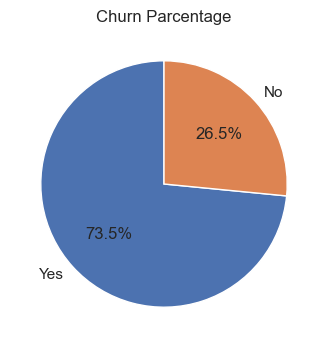

In [14]:
plt.figure(figsize=(8,4))
plt.pie(df['Churn'].value_counts(), labels=['Yes','No'], autopct='%1.1f%%', startangle=90)
plt.title("Churn Parcentage")

plt.show()

In [15]:
100*df['Churn'].value_counts()/ len(df['Churn'])

0    73.457024
1    26.542976
Name: Churn, dtype: float64

In [16]:
df['Churn'].value_counts()

0    3880
1    1402
Name: Churn, dtype: int64

###### Data is imbalance

# Univariate Analysis 

##### Create count plots for categorical variables with 'Churn'to compare the distribution of 'Churn' for different categories within each variable

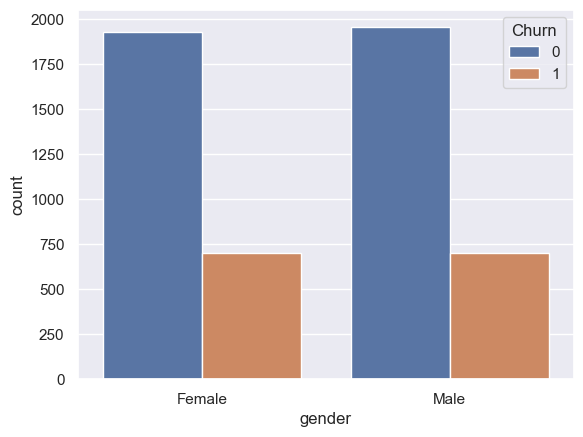

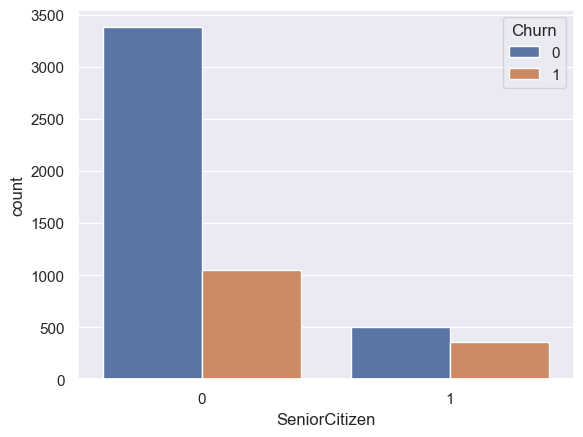

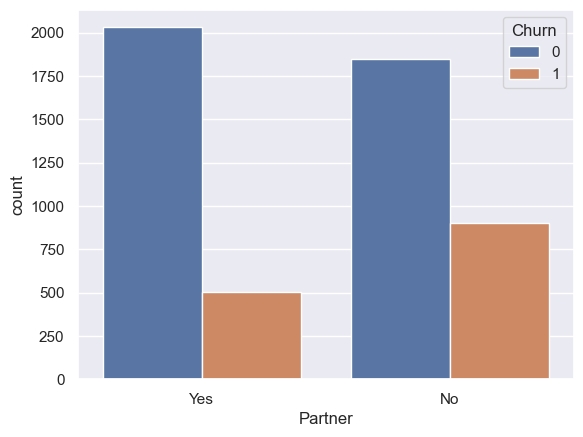

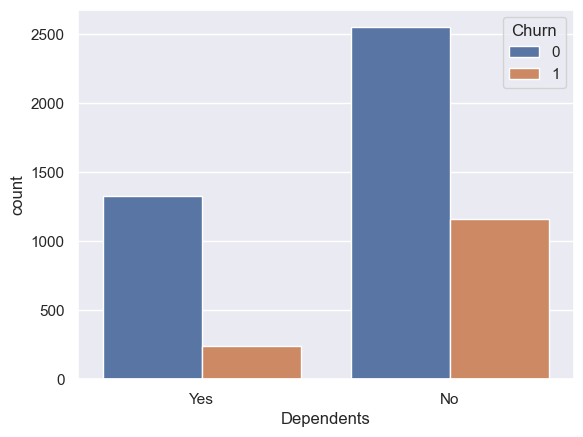

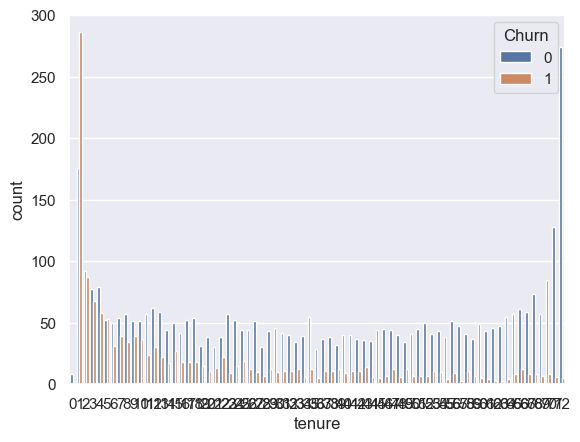

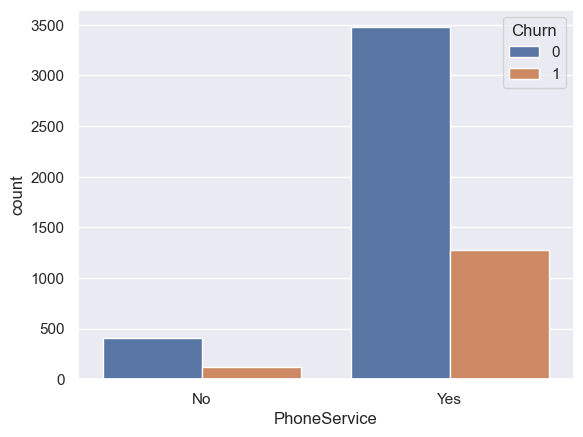

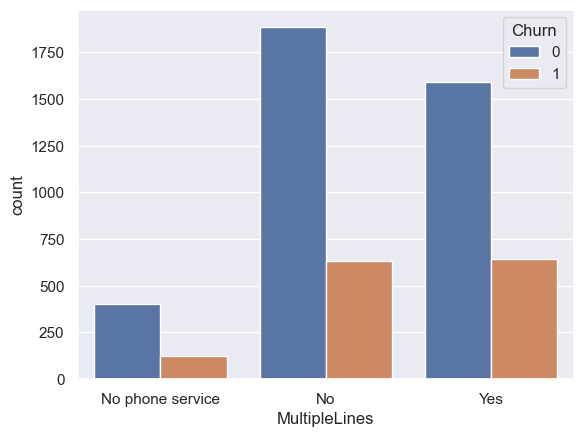

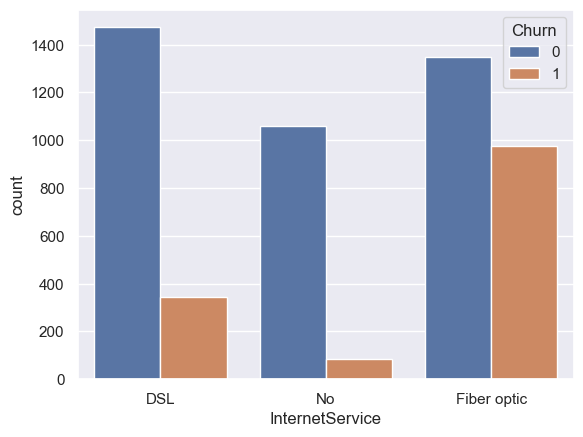

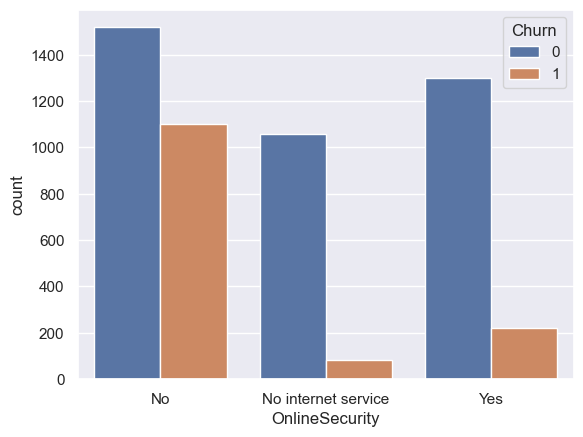

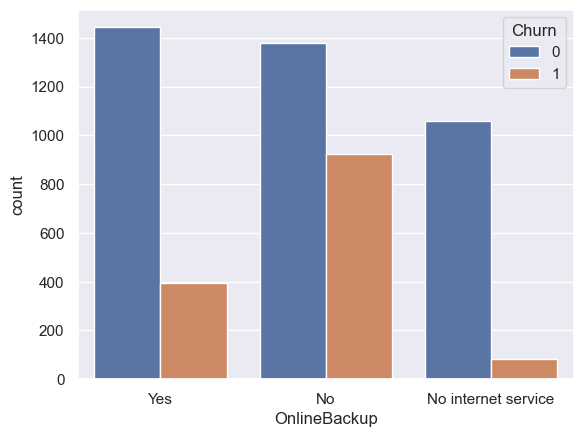

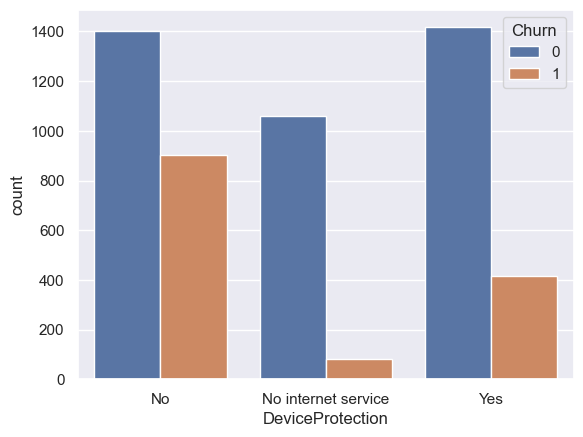

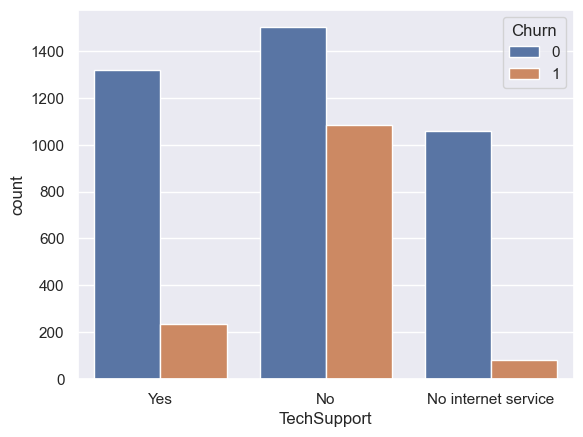

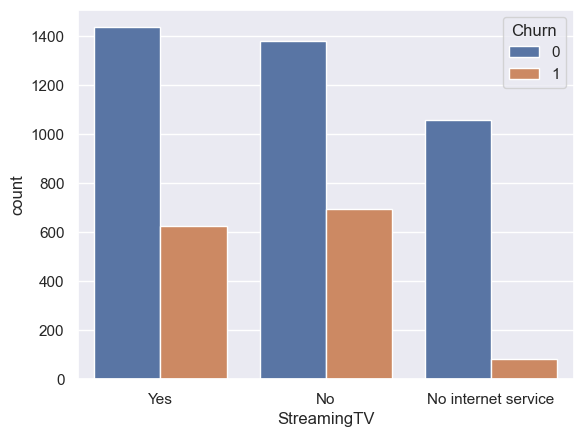

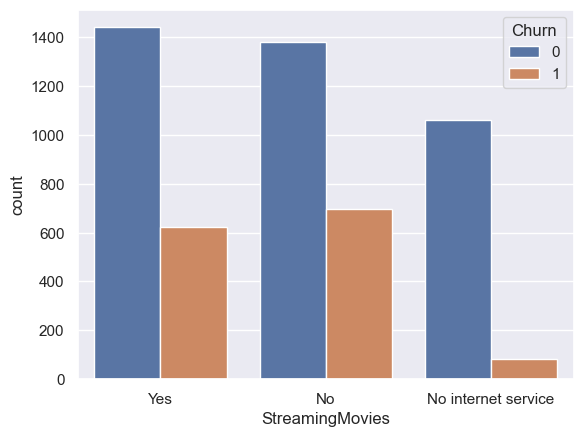

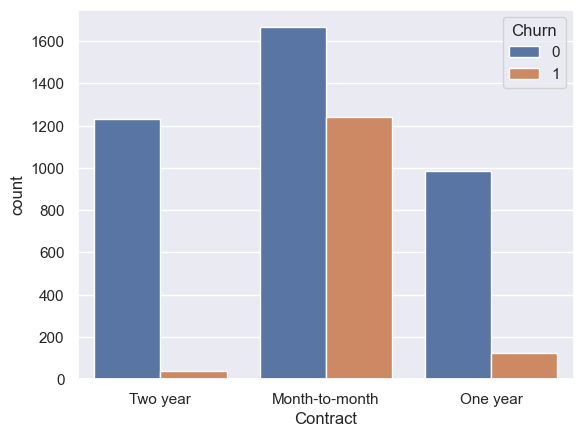

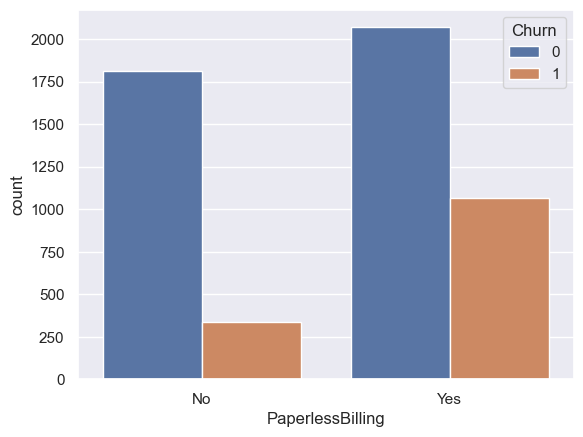

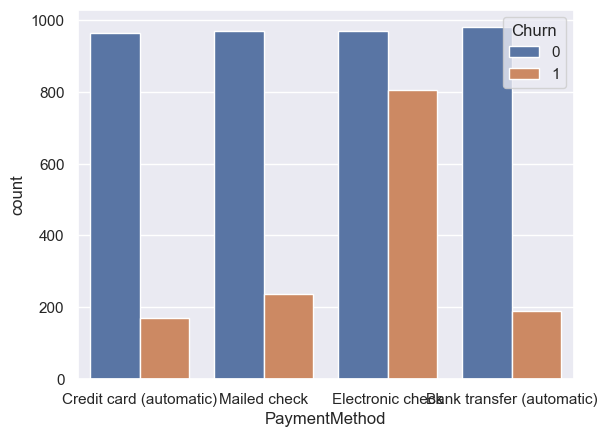

In [17]:
for i, variable in enumerate(df.drop(columns = ['Churn', 'TotalCharges', 'MonthlyCharges'])):
    plt.figure(i)
    sns.countplot(data = df, x = variable, hue = 'Churn')

#### Observation
1)The number of male and female customers who chose to churn is nearly the same
2)Customers who do not have partners tend to churn more than those who have.
3)Young customers tend to have a higher churn rate than senior citizens. From this, we can develop new marketing strategies focusing on young customers.
4)Customers who are not dependents have a higher churning rate than those who are dependent.
5)Customers who opt for phone services tend to churn more frequently.
6)customers who opt for Fiber optic tends to churn more.
7)customers who don't have online security are tends to churn more.
8)customers who don't have online backup are tends to churn more.
9)customers who don't have Device protection are tends to churn more.
10)customers who did't get Tech support are tends to churn more.
11)customers who did the electronics check are tends to churn more.


######its difficult to undrestant the plot of tenure because of more valve but Looking at the tenure we can undestand it is given in months so we are going to dividing customers into bins based on tenure e.g. for tenure < 12 months: assign a tenure group if 1 - 12, for tenure between 1 to 2 years, tenure group of 13 - 24, and so on

In [18]:
# Getting the max tenure
print(df['tenure'].max())

72


In [19]:
# Grouping the tenure in bins of 12 months
labels = ["{0} - {1}".format(i, i + 11)for i in range(1, 72, 12)] #list  comprehension 

df['tenure_group'] = pd.cut(df.tenure, range(1, 80, 12), right=False, labels = labels)

In [20]:
df['tenure_group'].value_counts()

1 - 12     1644
61 - 72    1061
13 - 24     752
25 - 36     624
49 - 60     610
37 - 48     583
Name: tenure_group, dtype: int64

In [21]:
# droping column tenure 
df.drop(columns = ['tenure'], axis = 1, inplace =True)
df.head()

,gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,tenure_group
0,Female,0,Yes,Yes,No,No phone service,DSL,No,Yes,No,Yes,Yes,Yes,Two year,No,Credit card (automatic),53.65,3784.00,0,61 - 72
1,Female,0,No,No,Yes,No,DSL,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,46.00,193.60,1,1 - 12
2,Male,0,No,Yes,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,21.20,1238.65,0,49 - 60
3,Male,0,No,No,Yes,Yes,Fiber optic,No,Yes,No,Yes,No,Yes,Month-to-month,Yes,Electronic check,94.45,5124.60,1,49 - 60
4,Female,0,No,No,Yes,No,Fiber optic,No,No,No,No,No,Yes,Month-to-month,Yes,Electronic check,79.55,723.40,1,1 - 12


## Tenure Group 

<Axes: xlabel='tenure_group', ylabel='count'>

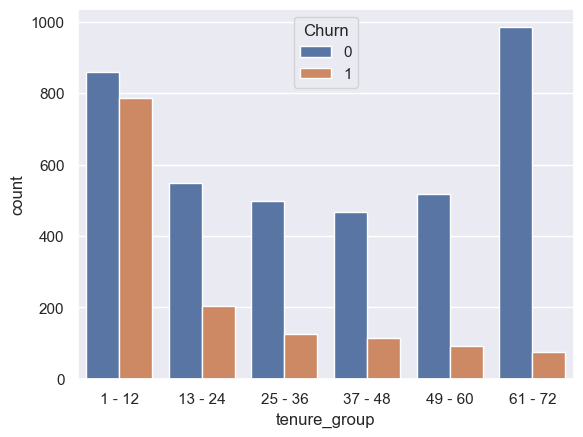

In [22]:
sns.countplot(x = "tenure_group", data = df, hue = 'Churn')

##### Customers who tend to choose yearly or month-to-month contracts tend to churn more.

#### Converting all the categorical variables into dummy variables 

In [23]:
df = pd.get_dummies(df)

In [24]:
df.head()

,SeniorCitizen,MonthlyCharges,TotalCharges,Churn,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,...,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,tenure_group_1 - 12,tenure_group_13 - 24,tenure_group_25 - 36,tenure_group_37 - 48,tenure_group_49 - 60,tenure_group_61 - 72
0,0,53.65,3784.00,0,1,0,0,1,0,1,...,0,1,0,0,0,0,0,0,0,1
1,0,46.00,193.60,1,1,0,1,0,1,0,...,0,0,0,1,1,0,0,0,0,0
2,0,21.20,1238.65,0,0,1,1,0,0,1,...,0,0,0,1,0,0,0,0,1,0
3,0,94.45,5124.60,1,0,1,1,0,1,0,...,0,0,1,0,0,0,0,0,1,0
4,0,79.55,723.40,1,1,0,1,0,1,0,...,0,0,1,0,1,0,0,0,0,0


In [25]:
# Are there any missing values ?
df.isnull().sum()

SeniorCitizen                              0
MonthlyCharges                             0
TotalCharges                               0
Churn                                      0
gender_Female                              0
gender_Male                                0
Partner_No                                 0
Partner_Yes                                0
Dependents_No                              0
Dependents_Yes                             0
PhoneService_No                            0
PhoneService_Yes                           0
MultipleLines_No                           0
MultipleLines_No phone service             0
MultipleLines_Yes                          0
InternetService_DSL                        0
InternetService_Fiber optic                0
InternetService_No                         0
OnlineSecurity_No                          0
OnlineSecurity_No internet service         0
OnlineSecurity_Yes                         0
OnlineBackup_No                            0
OnlineBack

In [26]:
df.columns.values

array(['SeniorCitizen', 'MonthlyCharges', 'TotalCharges', 'Churn',
       'gender_Female', 'gender_Male', 'Partner_No', 'Partner_Yes',
       'Dependents_No', 'Dependents_Yes', 'PhoneService_No',
       'PhoneService_Yes', 'MultipleLines_No',
       'MultipleLines_No phone service', 'MultipleLines_Yes',
       'InternetService_DSL', 'InternetService_Fiber optic',
       'InternetService_No', 'OnlineSecurity_No',
       'OnlineSecurity_No internet service', 'OnlineSecurity_Yes',
       'OnlineBackup_No', 'OnlineBackup_No internet service',
       'OnlineBackup_Yes', 'DeviceProtection_No',
       'DeviceProtection_No internet service', 'DeviceProtection_Yes',
       'TechSupport_No', 'TechSupport_No internet service',
       'TechSupport_Yes', 'StreamingTV_No',
       'StreamingTV_No internet service', 'StreamingTV_Yes',
       'StreamingMovies_No', 'StreamingMovies_No internet service',
       'StreamingMovies_Yes', 'Contract_Month-to-month',
       'Contract_One year', 'Contract_Two ye

## Churn by monthly Charges and Total charges 

Text(0.5, 1.0, 'Monthly charges by churn')

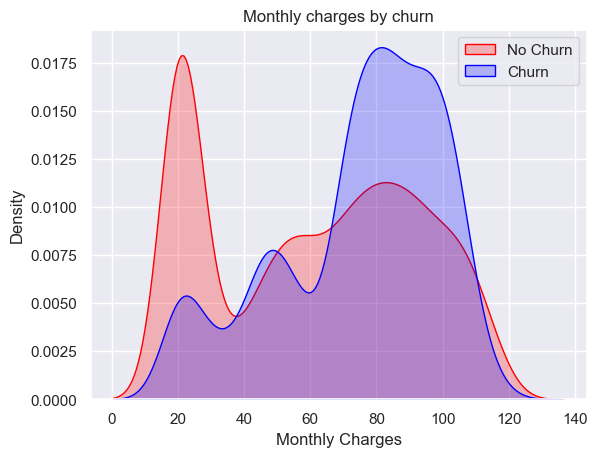

In [27]:
Mth = sns.kdeplot(df.MonthlyCharges[(df["Churn"] == 0)], color = "Red", fill= True)
Mth = sns.kdeplot(df.MonthlyCharges[(df["Churn"] == 1)], color = "Blue", fill= True)
Mth.legend(["No Churn", "Churn"], loc = 'upper right')
Mth.set_ylabel('Density')
Mth.set_xlabel('Monthly Charges')
Mth.set_title('Monthly charges by churn')

##### Churn is high when Monthaly Charges are high 

Text(0.5, 1.0, 'Total charges by churn')

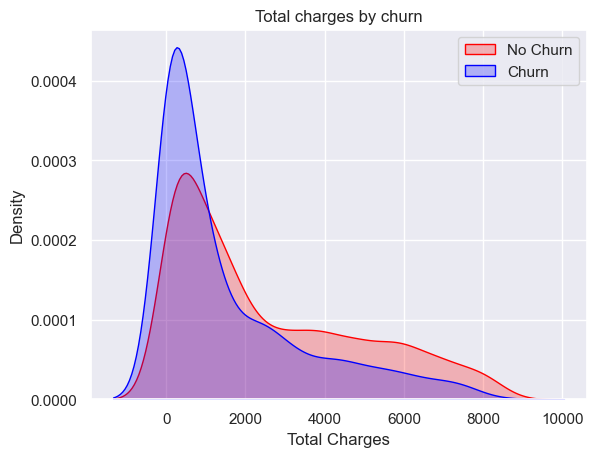

In [28]:
Mth = sns.kdeplot(df.TotalCharges[(df["Churn"] == 0)], color = "Red", fill= True)
Mth = sns.kdeplot(df.TotalCharges[(df["Churn"] == 1)], color = "Blue", fill= True)
Mth.legend(["No Churn", "Churn"], loc = 'upper right')
Mth.set_ylabel('Density')
Mth.set_xlabel('Total Charges')
Mth.set_title('Total charges by churn')

#### Surprising insight as higher Churn at lower Total Charges

However if we combine the insights of 3 parameters i.e. Tenure, Monthly Charges & Total Charges then the picture is bit clear :- Higher Monthly Charge at lower tenure results into lower Total Charge and higher Churn.

Hence, all these 3 factors viz Higher Monthly Charge, Lower tenure and Lower Total Charge are linkd to High Churn. 

### Correlation Plot

In [29]:
df.iloc[:].corr()

,SeniorCitizen,MonthlyCharges,TotalCharges,Churn,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,...,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,tenure_group_1 - 12,tenure_group_13 - 24,tenure_group_25 - 36,tenure_group_37 - 48,tenure_group_49 - 60,tenure_group_61 - 72
SeniorCitizen,1.000000,0.219771,0.104335,0.147522,-0.009666,0.009666,-0.017999,0.017999,0.212798,-0.212798,...,-0.014560,-0.033118,0.172824,-0.147573,-0.025994,-0.005688,0.030043,-0.004067,0.022735,-0.002495
MonthlyCharges,0.219771,1.000000,0.654113,0.197351,0.025320,-0.025320,-0.105780,0.105780,0.114303,-0.114303,...,0.047931,0.028659,0.269806,-0.378830,-0.190620,-0.059762,-0.004105,0.025176,0.079991,0.195095
TotalCharges,0.104335,0.654113,1.000000,-0.192931,0.015032,-0.015032,-0.319463,0.319463,-0.057879,0.057879,...,0.190646,0.181851,-0.063022,-0.295463,-0.593485,-0.212432,-0.055157,0.086458,0.254029,0.645290
Churn,0.147522,0.197351,-0.192931,1.000000,0.001927,-0.001927,0.146185,-0.146185,0.166507,-0.166507,...,-0.123674,-0.137365,0.302988,-0.084116,0.323772,0.006622,-0.051312,-0.054383,-0.092446,-0.220045
gender_Female,-0.009666,0.025320,0.015032,0.001927,1.000000,-1.000000,-0.008468,0.008468,0.013877,-0.013877,...,0.004601,0.002241,0.008314,-0.016092,-0.012284,0.006803,-0.016553,0.024489,0.012852,-0.007831
gender_Male,0.009666,-0.025320,-0.015032,-0.001927,-1.000000,1.000000,0.008468,-0.008468,-0.013877,0.013877,...,-0.004601,-0.002241,-0.008314,0.016092,0.012284,-0.006803,0.016553,-0.024489,-0.012852,0.007831
Partner_No,-0.017999,-0.105780,-0.319463,0.146185,-0.008468,0.008468,1.000000,-1.000000,0.441677,-0.441677,...,-0.120829,-0.072169,0.078470,0.101827,0.299063,0.050564,-0.004413,-0.036789,-0.093045,-0.280159
Partner_Yes,0.017999,0.105780,0.319463,-0.146185,0.008468,-0.008468,-1.000000,1.000000,-0.441677,0.441677,...,0.120829,0.072169,-0.078470,-0.101827,-0.299063,-0.050564,0.004413,0.036789,0.093045,0.280159
Dependents_No,0.212798,0.114303,-0.057879,0.166507,0.013877,-0.013877,0.441677,-0.441677,1.000000,-1.000000,...,-0.061000,-0.055272,0.150371,-0.054730,0.138113,-0.004293,-0.007243,-0.015630,-0.029558,-0.108408
Dependents_Yes,-0.212798,-0.114303,0.057879,-0.166507,-0.013877,0.013877,-0.441677,0.441677,-1.000000,1.000000,...,0.061000,0.055272,-0.150371,0.054730,-0.138113,0.004293,0.007243,0.015630,0.029558,0.108408


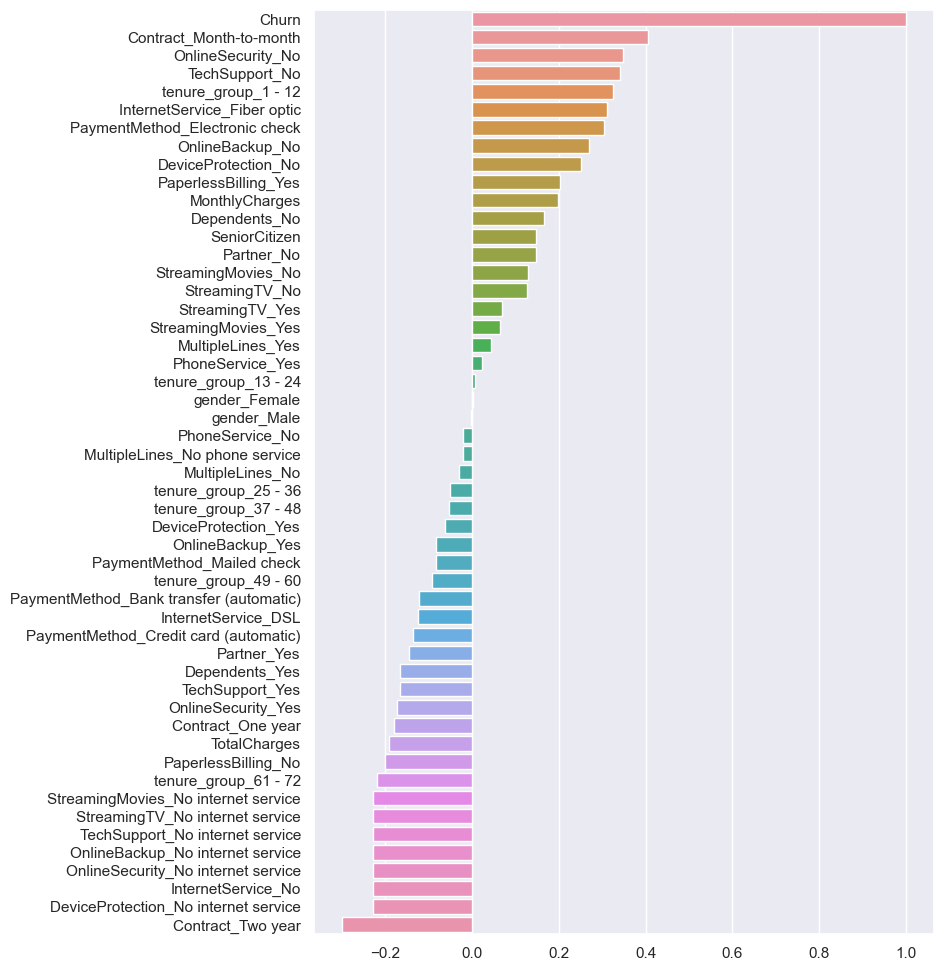

In [30]:
## creates a bar plot to visualize the correlation between the 'Churn' column and all other columns
plt.figure(figsize=(8, 12))
correlation = df.corr()["Churn"].sort_values(ascending=False)
sns.barplot(y=correlation.index, x=correlation.values)
plt.show()

####  Insight:¶
High Churn seen in case of 'Month to month contracts', 'No online security', 'No Tech support',and 'Fibre Optics Internet'.

Low Churn is seens in case of Long term contracts, Subscriptions without internet service and The customers engaged for 5+ years

Factors like Gender, Availability of PhoneService and  multiple lines have alomost NO impact on Churn

<Axes: >

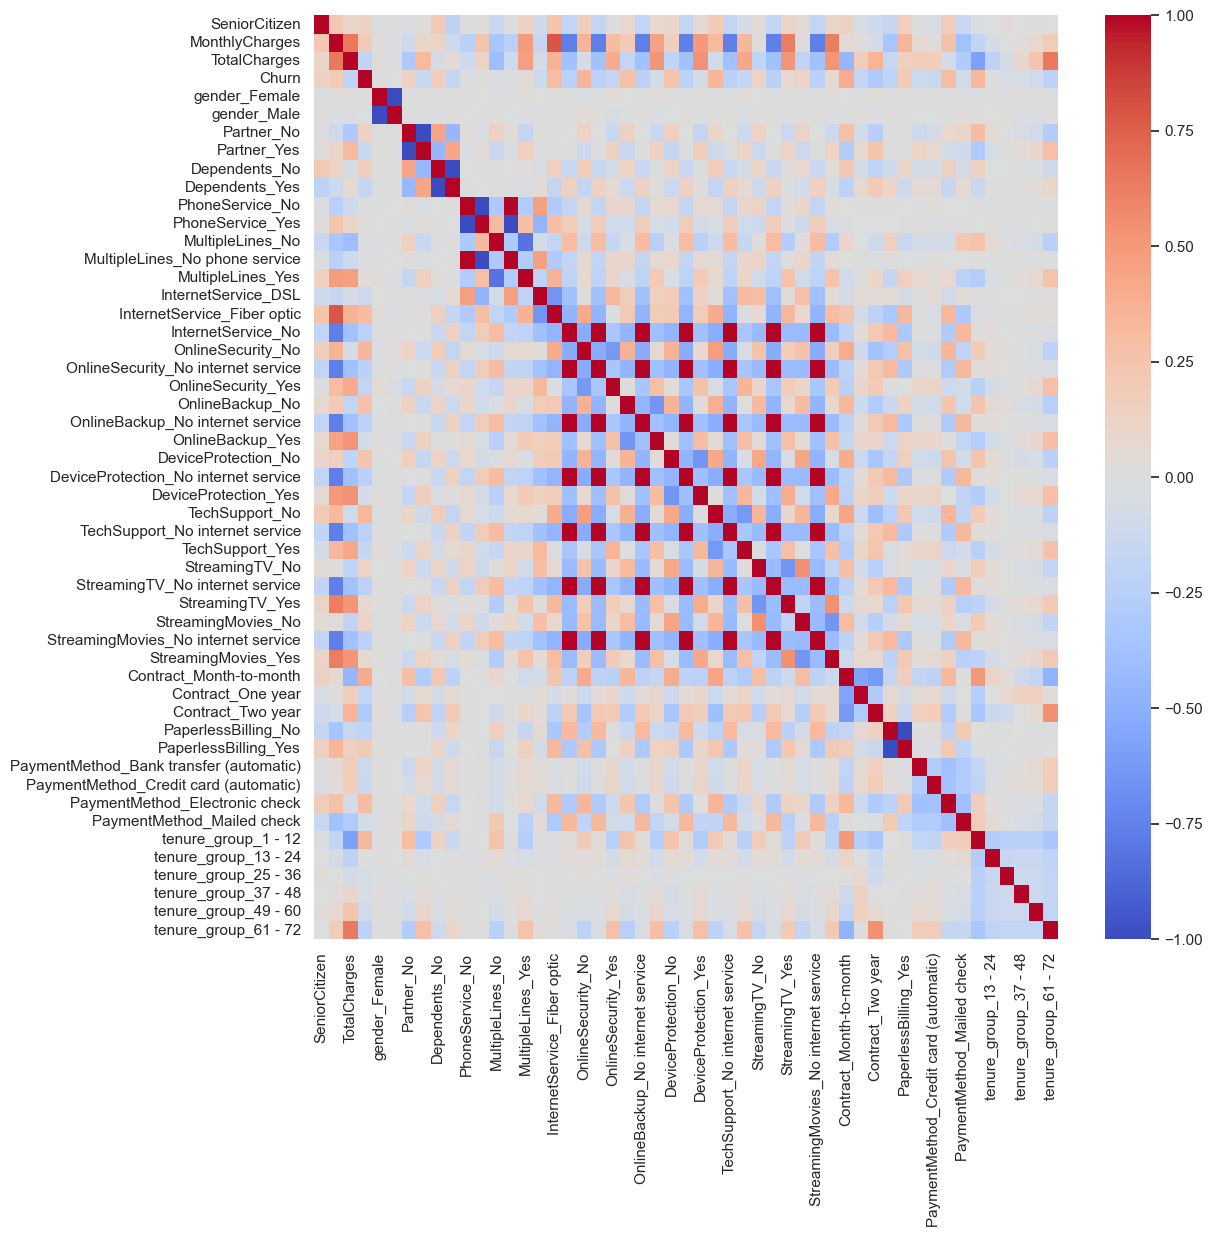

In [31]:
#coorelation heatmap
plt.figure(figsize=(12,12)) 
sns.heatmap(df.corr(), cmap='coolwarm') 



In [32]:
df.head()

,SeniorCitizen,MonthlyCharges,TotalCharges,Churn,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,...,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,tenure_group_1 - 12,tenure_group_13 - 24,tenure_group_25 - 36,tenure_group_37 - 48,tenure_group_49 - 60,tenure_group_61 - 72
0,0,53.65,3784.00,0,1,0,0,1,0,1,...,0,1,0,0,0,0,0,0,0,1
1,0,46.00,193.60,1,1,0,1,0,1,0,...,0,0,0,1,1,0,0,0,0,0
2,0,21.20,1238.65,0,0,1,1,0,0,1,...,0,0,0,1,0,0,0,0,1,0
3,0,94.45,5124.60,1,0,1,1,0,1,0,...,0,0,1,0,0,0,0,0,1,0
4,0,79.55,723.40,1,1,0,1,0,1,0,...,0,0,1,0,1,0,0,0,0,0


In [33]:
# Calculate the correlation matrix
correlation_matrix = df.corr()

# Define a threshold for high correlation (e.g., 0.7)
threshold = 0.7

# Find highly correlated columns
highly_correlated = set()
for i in range(len(correlation_matrix.columns)):
    for j in range(i):
        if abs(correlation_matrix.iloc[i, j]) > threshold:
            colname = correlation_matrix.columns[i]
            highly_correlated.add(colname)

# Drop highly correlated columns from the DataFrame
df1 = df.drop(columns=highly_correlated)

In [34]:
df1.head()

,SeniorCitizen,MonthlyCharges,TotalCharges,Churn,gender_Female,Partner_No,Dependents_No,PhoneService_No,MultipleLines_No,InternetService_DSL,...,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,tenure_group_1 - 12,tenure_group_13 - 24,tenure_group_25 - 36,tenure_group_37 - 48,tenure_group_49 - 60,tenure_group_61 - 72
0,0,53.65,3784.00,0,1,0,0,1,0,1,...,0,1,0,0,0,0,0,0,0,1
1,0,46.00,193.60,1,1,1,1,0,1,1,...,0,0,0,1,1,0,0,0,0,0
2,0,21.20,1238.65,0,0,1,0,0,1,0,...,0,0,0,1,0,0,0,0,1,0
3,0,94.45,5124.60,1,0,1,1,0,0,0,...,0,0,1,0,0,0,0,0,1,0
4,0,79.55,723.40,1,1,1,1,0,1,0,...,0,0,1,0,1,0,0,0,0,0


<Axes: >

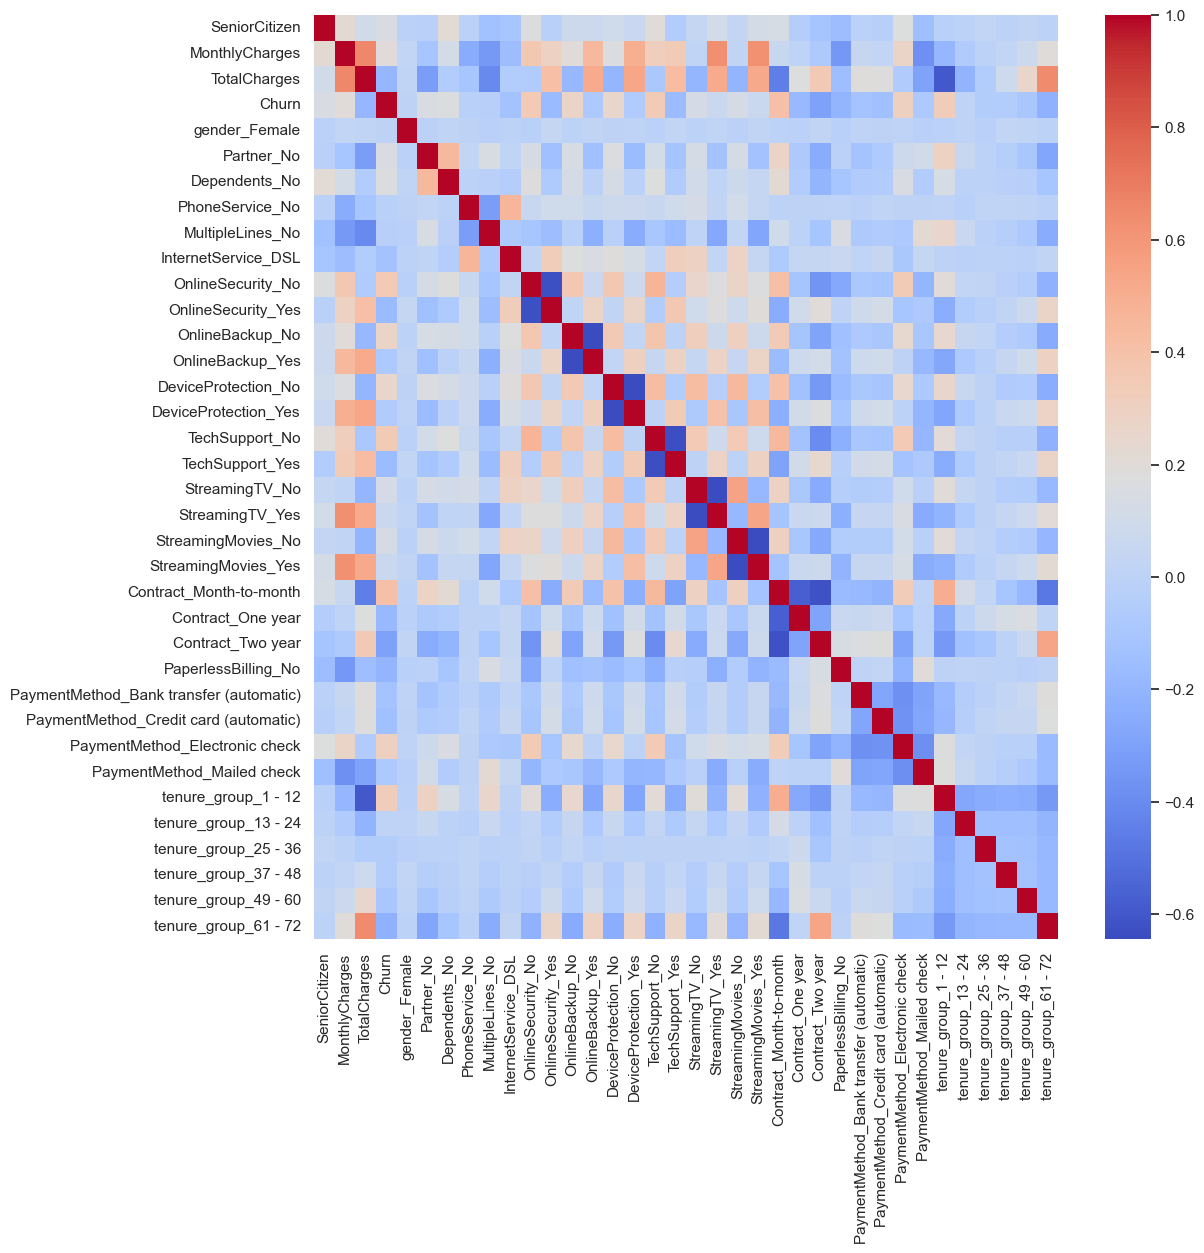

In [35]:
#coorelation heatmap
plt.figure(figsize=(12,12)) 
sns.heatmap(df1.corr(), cmap='coolwarm')

In [36]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5282 entries, 0 to 5281
Data columns (total 36 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   SeniorCitizen                            5282 non-null   int64  
 1   MonthlyCharges                           5282 non-null   float64
 2   TotalCharges                             5282 non-null   float64
 3   Churn                                    5282 non-null   int64  
 4   gender_Female                            5282 non-null   uint8  
 5   Partner_No                               5282 non-null   uint8  
 6   Dependents_No                            5282 non-null   uint8  
 7   PhoneService_No                          5282 non-null   uint8  
 8   MultipleLines_No                         5282 non-null   uint8  
 9   InternetService_DSL                      5282 non-null   uint8  
 10  OnlineSecurity_No                        5282 no

### Outlier Checks

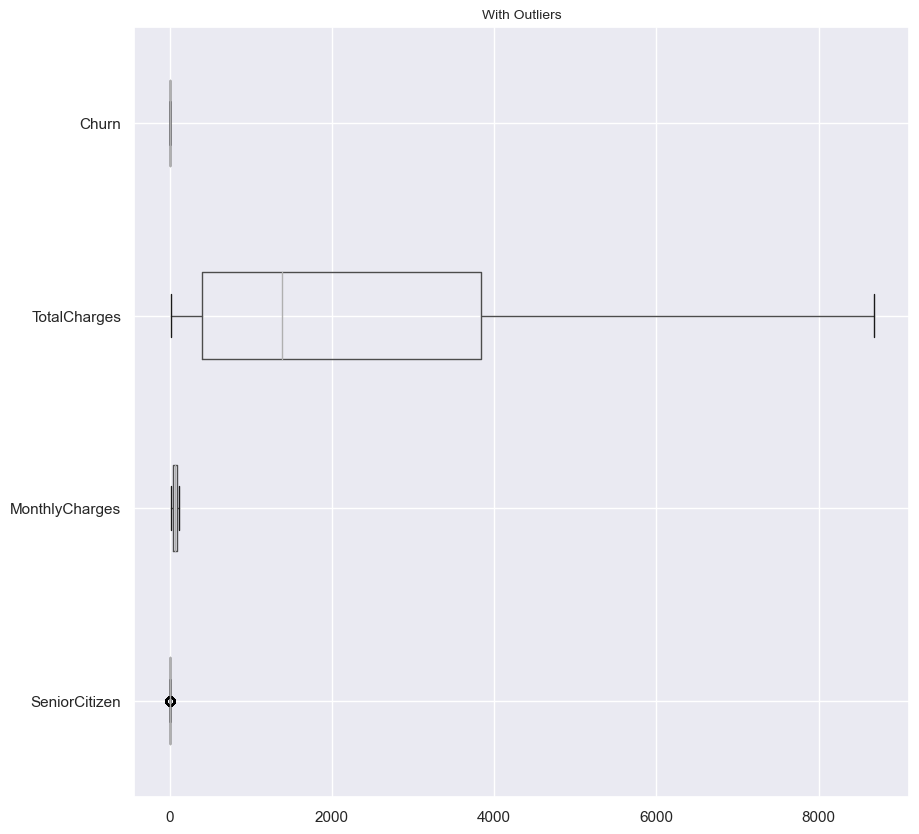

In [37]:
# construct box plot for continuous variables
cont=df1.dtypes[(df1.dtypes!='uint8') & (df1.dtypes!='bool')].index
plt.figure(figsize=(10,10))
df1[cont].boxplot(vert=0)
plt.title('With Outliers',fontsize=10)
plt.show()

In [ ]:
# there is no outlier

### Data Distribution 

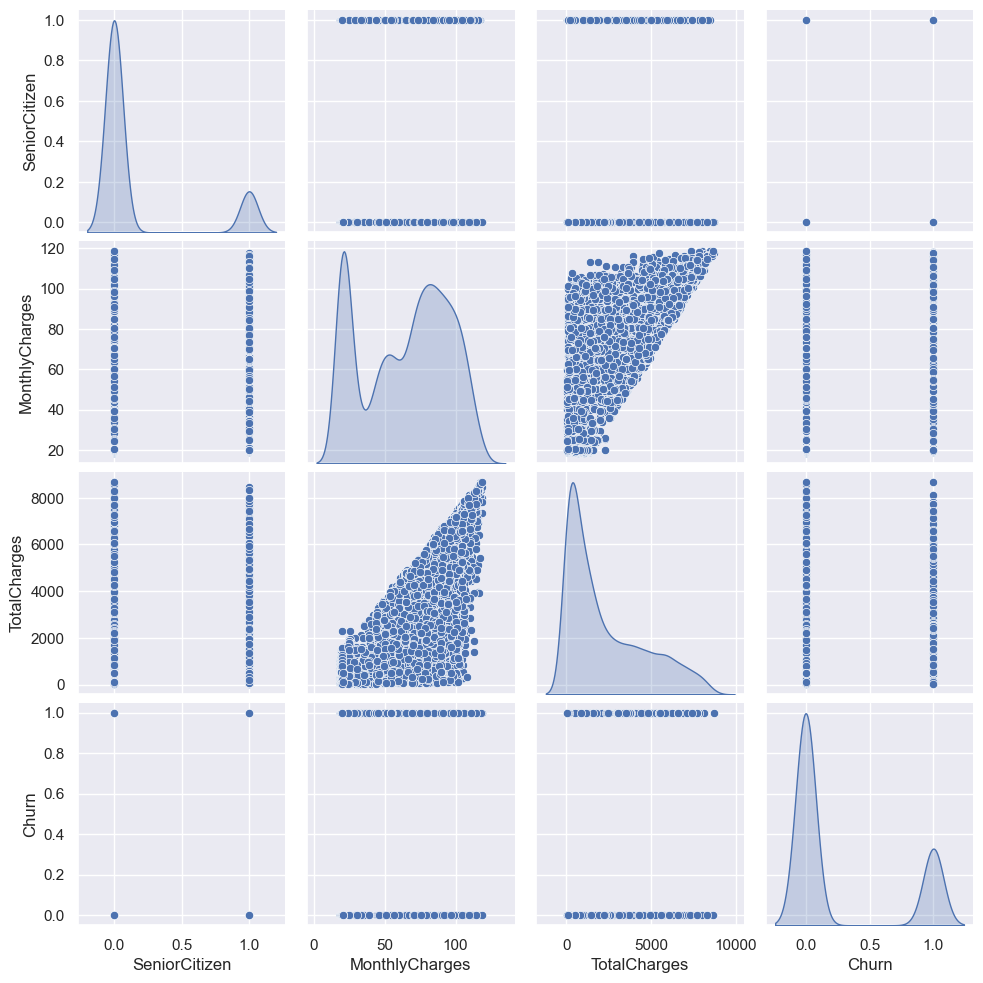

In [38]:
df_attr = (df1[cont])
sns.pairplot(df_attr, diag_kind='kde')  
plt.show()

### Train-Test Split 

In [39]:
# Copy all the predictor variables into X dataframe
X = df1.drop('Churn', axis=1)

# Copy target into the y dataframe. 
y = df1[['Churn']]

In [40]:
X.head()

,SeniorCitizen,MonthlyCharges,TotalCharges,gender_Female,Partner_No,Dependents_No,PhoneService_No,MultipleLines_No,InternetService_DSL,OnlineSecurity_No,...,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,tenure_group_1 - 12,tenure_group_13 - 24,tenure_group_25 - 36,tenure_group_37 - 48,tenure_group_49 - 60,tenure_group_61 - 72
0,0,53.65,3784.00,1,0,0,1,0,1,1,...,0,1,0,0,0,0,0,0,0,1
1,0,46.00,193.60,1,1,1,0,1,1,1,...,0,0,0,1,1,0,0,0,0,0
2,0,21.20,1238.65,0,1,0,0,1,0,0,...,0,0,0,1,0,0,0,0,1,0
3,0,94.45,5124.60,0,1,1,0,0,0,1,...,0,0,1,0,0,0,0,0,1,0
4,0,79.55,723.40,1,1,1,0,1,0,1,...,0,0,1,0,1,0,0,0,0,0


In [41]:
y.head()

,Churn
0,0
1,1
2,0
3,1
4,1


In [42]:
# Split X and y into training and test set in 75:25 ratio
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25,random_state=1 )

In [43]:
X_train

,SeniorCitizen,MonthlyCharges,TotalCharges,gender_Female,Partner_No,Dependents_No,PhoneService_No,MultipleLines_No,InternetService_DSL,OnlineSecurity_No,...,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,tenure_group_1 - 12,tenure_group_13 - 24,tenure_group_25 - 36,tenure_group_37 - 48,tenure_group_49 - 60,tenure_group_61 - 72
3872,0,55.90,238.50,0,1,1,0,1,1,1,...,0,0,1,0,1,0,0,0,0,0
5098,0,74.55,824.75,0,1,1,0,1,0,1,...,0,0,1,0,1,0,0,0,0,0
3192,1,30.35,1359.70,0,0,1,1,0,1,1,...,0,0,1,0,0,0,0,1,0,0
3066,0,81.00,389.60,1,1,1,0,1,0,1,...,0,1,0,0,1,0,0,0,0,0
2313,0,18.95,110.15,0,1,1,0,1,0,0,...,0,0,0,1,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
905,0,103.30,6518.35,1,0,1,0,0,0,1,...,1,0,0,0,0,0,0,0,0,1
5192,0,97.95,384.50,1,0,0,0,0,0,1,...,0,0,1,0,1,0,0,0,0,0
3980,0,24.50,46.40,1,1,1,1,0,1,1,...,0,0,1,0,1,0,0,0,0,0
235,1,25.80,25.80,1,1,1,1,0,1,1,...,0,0,0,1,1,0,0,0,0,0


### Model Building 

In [44]:
import pandas as pd
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.metrics import recall_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from imblearn.combine import SMOTEENN

In [45]:
import statsmodels.api as sm

In [47]:
X_train=sm.add_constant(X_train)# This adds the constant term beta0 to the Simple Linear Regression.
X_test=sm.add_constant(X_test)

In [46]:
model = sm.OLS(y_train,X_train).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  Churn   R-squared:                       0.302
Model:                            OLS   Adj. R-squared:                  0.297
Method:                 Least Squares   F-statistic:                     60.77
Date:                Sat, 30 Sep 2023   Prob (F-statistic):          1.80e-281
Time:                        18:58:36   Log-Likelihood:                -1687.8
No. Observations:                3961   AIC:                             3434.
Df Residuals:                    3932   BIC:                             3616.
Df Model:                          28                                         
Covariance Type:            nonrobust                                         
                                              coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------

In [47]:
# let's check the VIF of the predictors
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif_series1 = pd.Series(
    [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])],
    index=X_train.columns,
)
print("VIF values: \n\n{}\n".format(vif_series1))

C:\Users\Lenovo\anaconda3\Lib\site-packages\statsmodels\stats\outliers_influence.py:195: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


VIF values: 

SeniorCitizen                                1.145969
MonthlyCharges                             861.615815
TotalCharges                                10.868429
gender_Female                                1.006319
Partner_No                                   1.453336
Dependents_No                                1.387847
PhoneService_No                             53.777088
MultipleLines_No                             7.326360
InternetService_DSL                        132.844745
OnlineSecurity_No                                 inf
OnlineSecurity_Yes                                inf
OnlineBackup_No                                   inf
OnlineBackup_Yes                                  inf
DeviceProtection_No                               inf
DeviceProtection_Yes                              inf
TechSupport_No                                    inf
TechSupport_Yes                                   inf
StreamingTV_No                                    inf
StreamingTV_Ye

In [48]:
X_train.columns

Index(['SeniorCitizen', 'MonthlyCharges', 'TotalCharges', 'gender_Female',
       'Partner_No', 'Dependents_No', 'PhoneService_No', 'MultipleLines_No',
       'InternetService_DSL', 'OnlineSecurity_No', 'OnlineSecurity_Yes',
       'OnlineBackup_No', 'OnlineBackup_Yes', 'DeviceProtection_No',
       'DeviceProtection_Yes', 'TechSupport_No', 'TechSupport_Yes',
       'StreamingTV_No', 'StreamingTV_Yes', 'StreamingMovies_No',
       'StreamingMovies_Yes', 'Contract_Month-to-month', 'Contract_One year',
       'Contract_Two year', 'PaperlessBilling_No',
       'PaymentMethod_Bank transfer (automatic)',
       'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check',
       'tenure_group_1 - 12', 'tenure_group_13 - 24', 'tenure_group_25 - 36',
       'tenure_group_37 - 48', 'tenure_group_49 - 60', 'tenure_group_61 - 72'],
      dtype='object')

In [49]:
#1) Removing predictor 'MonthlyCharges' as VIF>2
X_train2 = X_train.drop(["MonthlyCharges"], axis=1)
olsmod_1 = sm.OLS(y_train, X_train2)
olsres_1 = olsmod_1.fit()
print(
    "R-squared:",
    np.round(olsres_1.rsquared, 3),
    "\nAdjusted R-squared:",
    np.round(olsres_1.rsquared_adj, 3),
)

R-squared: 0.302 
Adjusted R-squared: 0.297


In [ ]:
# there is no effect on the adjusted R2 

In [50]:
#2) Removing predictor 'TotalCharges' as VIF>2
X_train3 = X_train.drop(["TotalCharges"], axis=1)
olsmod_2 = sm.OLS(y_train, X_train3)
olsres_2 = olsmod_2.fit()
print(
    "R-squared:",
    np.round(olsres_2.rsquared, 3),
    "\nAdjusted R-squared:",
    np.round(olsres_2.rsquared_adj, 3),
)

R-squared: 0.288 
Adjusted R-squared: 0.283


In [ ]:
# Seems like an important predictor and thus would not choose to drop it .

In [51]:
#3) Removing predictor 'InternetService_DSL ' as VIF>2 
X_train4 = X_train.drop(["InternetService_DSL"], axis=1)
olsmod_3 = sm.OLS(y_train, X_train4)
olsres_3 = olsmod_3.fit()
print(
    "R-squared:",
    np.round(olsres_3.rsquared, 3),
    "\nAdjusted R-squared:",
    np.round(olsres_3.rsquared_adj, 3),
)

R-squared: 0.301 
Adjusted R-squared: 0.297


In [ ]:
# there is no effect on the adjusted R2 

In [52]:
#4) Removing predictor '"tenure_group_1 - 12","tenure_group_13 - 24","tenure_group_25 - 36","tenure_group_37 - 48","tenure_group_49 - 60","tenure_group_61 - 72" ' as VIF>2 
X_train5 = X_train.drop(["tenure_group_1 - 12","tenure_group_13 - 24","tenure_group_25 - 36","tenure_group_37 - 48","tenure_group_49 - 60","tenure_group_61 - 72"], axis=1)
olsmod_3 = sm.OLS(y_train, X_train4)
olsres_3 = olsmod_3.fit()
print(
    "R-squared:",
    np.round(olsres_3.rsquared, 3),
    "\nAdjusted R-squared:",
    np.round(olsres_3.rsquared_adj, 3),
)

R-squared: 0.301 
Adjusted R-squared: 0.297


In [ ]:
# there is no effect on the adjusted R2 

In [53]:
#5) Removing predictor 'PhoneService_No' as VIF>2 
X_train6 = X_train.drop(["PhoneService_No"], axis=1)
olsmod_3 = sm.OLS(y_train, X_train4)
olsres_3 = olsmod_3.fit()
print(
    "R-squared:",
    np.round(olsres_3.rsquared, 3),
    "\nAdjusted R-squared:",
    np.round(olsres_3.rsquared_adj, 3),
)

R-squared: 0.301 
Adjusted R-squared: 0.297


In [ ]:
# there is no effect on the adjusted R2 

In [54]:
#6) Removing predictor 'MultipleLines_No' as VIF>2 
X_train7 = X_train.drop(["MultipleLines_No"], axis=1)
olsmod_3 = sm.OLS(y_train, X_train4)
olsres_3 = olsmod_3.fit()
print(
    "R-squared:",
    np.round(olsres_3.rsquared, 3),
    "\nAdjusted R-squared:",
    np.round(olsres_3.rsquared_adj, 3),
)

R-squared: 0.301 
Adjusted R-squared: 0.297


In [ ]:
# there is no effect on the adjusted R2 

##### Dropping 'MonthlyCharges',"InternetService_DSL","tenure_group_1 - 12","tenure_group_13 - 24","tenure_group_25 - 36","tenure_group_37 - 48","tenure_group_49 - 60","tenure_group_61 - 72" from the training data¶
 

In [55]:
X_train = X_train.drop(["MonthlyCharges","InternetService_DSL","MultipleLines_No","PhoneService_No","tenure_group_1 - 12","tenure_group_13 - 24","tenure_group_25 - 36","tenure_group_37 - 48","tenure_group_49 - 60","tenure_group_61 - 72"], axis=1)

In [56]:
olsmod_5 = sm.OLS(y_train, X_train)
olsres_5 = olsmod_5.fit()
print(olsres_5.summary())

                            OLS Regression Results                            
Dep. Variable:                  Churn   R-squared:                       0.261
Model:                            OLS   Adj. R-squared:                  0.258
Method:                 Least Squares   F-statistic:                     77.43
Date:                Sat, 30 Sep 2023   Prob (F-statistic):          9.17e-243
Time:                        19:00:40   Log-Likelihood:                -1800.4
No. Observations:                3961   AIC:                             3639.
Df Residuals:                    3942   BIC:                             3758.
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
                                              coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------

In [57]:
# let's check the VIF of the predictors after removing'beds'
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif_series1 = pd.Series(
    [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])],
    index=X_train.columns,
)
print("VIF values: \n\n{}\n".format(vif_series1))

VIF values: 

SeniorCitizen                              1.133070
TotalCharges                               3.059769
gender_Female                              1.004156
Partner_No                                 1.441796
Dependents_No                              1.384024
OnlineSecurity_No                               inf
OnlineSecurity_Yes                              inf
OnlineBackup_No                                 inf
OnlineBackup_Yes                                inf
DeviceProtection_No                             inf
DeviceProtection_Yes                            inf
TechSupport_No                                  inf
TechSupport_Yes                                 inf
StreamingTV_No                                  inf
StreamingTV_Yes                                 inf
StreamingMovies_No                              inf
StreamingMovies_Yes                             inf
Contract_Month-to-month                         inf
Contract_One year                               in

C:\Users\Lenovo\anaconda3\Lib\site-packages\statsmodels\stats\outliers_influence.py:195: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


### Now that we do not have multicollinearity in our data, the p-values of the coefficients have become reliable and we can remove the non-significant predictor variables.

In [58]:
print(olsres_5.summary())

                            OLS Regression Results                            
Dep. Variable:                  Churn   R-squared:                       0.261
Model:                            OLS   Adj. R-squared:                  0.258
Method:                 Least Squares   F-statistic:                     77.43
Date:                Sat, 30 Sep 2023   Prob (F-statistic):          9.17e-243
Time:                        19:01:13   Log-Likelihood:                -1800.4
No. Observations:                3961   AIC:                             3639.
Df Residuals:                    3942   BIC:                             3758.
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
                                              coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------

### Now as few predictor have p-value>0.05 we remove that and build the model 

In [59]:
X_train8 = X_train.drop(["gender_Female","Partner_No","Dependents_No","OnlineSecurity_Yes","OnlineBackup_Yes","TechSupport_Yes","StreamingTV_No","StreamingMovies_No","Contract_Two year","PaymentMethod_Bank transfer (automatic)","PaymentMethod_Credit card (automatic)","PaymentMethod_Mailed check"], axis=1)
olsmod_6 = sm.OLS(y_train, X_train8)
olsres_6 = olsmod_6.fit()
print(olsres_6.summary())

                                 OLS Regression Results                                
Dep. Variable:                  Churn   R-squared (uncentered):                   0.458
Model:                            OLS   Adj. R-squared (uncentered):              0.456
Method:                 Least Squares   F-statistic:                              256.4
Date:                Sat, 30 Sep 2023   Prob (F-statistic):                        0.00
Time:                        19:01:28   Log-Likelihood:                         -1808.5
No. Observations:                3961   AIC:                                      3643.
Df Residuals:                    3948   BIC:                                      3725.
Df Model:                          13                                                  
Covariance Type:            nonrobust                                                  
                                     coef    std err          t      P>|t|      [0.025      0.975]
---------------------

### Linearity and Independence of predictors 

In [61]:
df_pred = pd.DataFrame()

df_pred["Actual Values"] = y_train.values.flatten()  # actual values
df_pred["Fitted Values"] = olsres_6.fittedvalues.values  # predicted values
df_pred["Residuals"] = olsres_6.resid.values  # residuals

df_pred.head()

,Actual Values,Fitted Values,Residuals
0,0,0.618782,-0.618782
1,1,0.500066,0.499934
2,1,0.538715,0.461285
3,1,0.526401,0.473599
4,0,0.159157,-0.159157


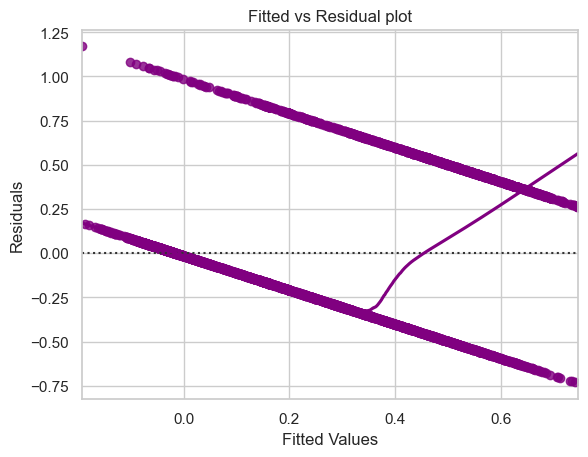

In [62]:
# let us plot the fitted values vs residuals
sns.set_style("whitegrid")
sns.residplot(
    data=df_pred, x="Fitted Values", y="Residuals", color="purple", lowess=True
)
plt.xlabel("Fitted Values")
plt.ylabel("Residuals")
plt.title("Fitted vs Residual plot")
plt.show()

### Test for Normality  

In [63]:
import scipy.stats as stats

In [64]:
stats.shapiro(df_pred["Residuals"])

ShapiroResult(statistic=0.9596014022827148, pvalue=7.398830632281816e-32)

In [65]:
olsres_6.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  Churn   R-squared (uncentered):                   0.458
Model:                            OLS   Adj. R-squared (uncentered):              0.456
Method:                 Least Squares   F-statistic:                              256.4
Date:                Sat, 30 Sep 2023   Prob (F-statistic):                        0.00
Time:                        19:08:42   Log-Likelihood:                         -1808.5
No. Observations:                3961   AIC:                                      3643.
Df Residuals:                    3948   BIC:                                      3725.
Df Model:                          13                                                  
Covariance Type:            nonrobust                                                  
==================================================================================================
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
SeniorCitizen                      0.0529      0.017      3.036      0.002       0.019       0.087
TotalCharges                   -2.672e-05    4.2e-06     -6.365      0.000   -3.49e-05   -1.85e-05
OnlineSecurity_No                  0.1040      0.016      6.543      0.000       0.073       0.135
OnlineBackup_No                    0.0410      0.015      2.651      0.008       0.011       0.071
DeviceProtection_No                0.0331      0.025      1.326      0.185      -0.016       0.082
DeviceProtection_Yes               0.0207      0.027      0.762      0.446      -0.033       0.074
TechSupport_No                     0.0873      0.016      5.410      0.000       0.056       0.119
StreamingTV_Yes                    0.0718      0.016      4.426      0.000       0.040       0.104
StreamingMovies_Yes                0.0620      0.016      3.798      0.000       0.030       0.094
Contract_Month-to-month            0.1995      0.017     11.966      0.000       0.167       0.232
Contract_One year                  0.0219      0.017      1.294      0.196      -0.011       0.055
PaperlessBilling_No               -0.0374      0.012     -3.242      0.001      -0.060      -0.015
PaymentMethod_Electronic check     0.0981      0.015      6.718      0.000       0.069       0.127
==============================================================================
Omnibus:                      225.721   Durbin-Watson:                   2.004
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              205.882
Skew:                           0.497   Prob(JB):                     1.96e-45
Kurtosis:                       2.491   Cond. No.                     2.00e+04
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The condition number is large,  2e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

# Predictions 

In [66]:
X_train8.columns

Index(['SeniorCitizen', 'TotalCharges', 'OnlineSecurity_No', 'OnlineBackup_No',
       'DeviceProtection_No', 'DeviceProtection_Yes', 'TechSupport_No',
       'StreamingTV_Yes', 'StreamingMovies_Yes', 'Contract_Month-to-month',
       'Contract_One year', 'PaperlessBilling_No',
       'PaymentMethod_Electronic check'],
      dtype='object')

In [67]:
X_test.columns

Index(['SeniorCitizen', 'MonthlyCharges', 'TotalCharges', 'gender_Female',
       'Partner_No', 'Dependents_No', 'PhoneService_No', 'MultipleLines_No',
       'InternetService_DSL', 'OnlineSecurity_No', 'OnlineSecurity_Yes',
       'OnlineBackup_No', 'OnlineBackup_Yes', 'DeviceProtection_No',
       'DeviceProtection_Yes', 'TechSupport_No', 'TechSupport_Yes',
       'StreamingTV_No', 'StreamingTV_Yes', 'StreamingMovies_No',
       'StreamingMovies_Yes', 'Contract_Month-to-month', 'Contract_One year',
       'Contract_Two year', 'PaperlessBilling_No',
       'PaymentMethod_Bank transfer (automatic)',
       'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check',
       'tenure_group_1 - 12', 'tenure_group_13 - 24', 'tenure_group_25 - 36',
       'tenure_group_37 - 48', 'tenure_group_49 - 60', 'tenure_group_61 - 72'],
      dtype='object')

In [68]:
# dropping columns from the test data that are not there in the training data
X_test2 = X_test.drop(
    ["gender_Female","Partner_No","Dependents_No","OnlineSecurity_Yes","OnlineBackup_Yes","TechSupport_Yes","StreamingTV_No","StreamingMovies_No","Contract_Two year","PaymentMethod_Bank transfer (automatic)","PaymentMethod_Credit card (automatic)","PaymentMethod_Mailed check","MonthlyCharges","InternetService_DSL","PhoneService_No","MultipleLines_No","tenure_group_1 - 12","tenure_group_13 - 24","tenure_group_25 - 36","tenure_group_37 - 48","tenure_group_49 - 60","tenure_group_61 - 72"], axis=1
)

In [69]:
X_test2.columns

Index(['SeniorCitizen', 'TotalCharges', 'OnlineSecurity_No', 'OnlineBackup_No',
       'DeviceProtection_No', 'DeviceProtection_Yes', 'TechSupport_No',
       'StreamingTV_Yes', 'StreamingMovies_Yes', 'Contract_Month-to-month',
       'Contract_One year', 'PaperlessBilling_No',
       'PaymentMethod_Electronic check'],
      dtype='object')

In [70]:
# let's make predictions on the test set
y_pred_test = olsres_6.predict(X_test2)
y_pred_train = olsres_6.predict(X_train8)

In [71]:
# To check model performance
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [72]:
# let's check the RMSE on the train data
rmse1 = np.sqrt(mean_squared_error(y_train, y_pred_train))
rmse1

0.38198892771903564

In [73]:
# let's check the RMSE on the test data
rmse2 = np.sqrt(mean_squared_error(y_test, y_pred_test))
rmse2

0.3815006273813729

### Linear Regression Model (sklearn)

In [74]:
# invoke the LinearRegression function and find the bestfit model on training data

regression_model = LinearRegression()

regression_model.fit(X_train8, y_train)

LinearRegression()

In [75]:
# Let us explore the coefficients for each of the independent attributes

for i, col_name in enumerate(X_train8.columns):
    print("The coefficient for {} is {}".format(col_name, regression_model.coef_[0][i]))

The coefficient for SeniorCitizen is 0.052241801511231284
The coefficient for TotalCharges is -3.30296108226766e-05
The coefficient for OnlineSecurity_No is 0.10414836862752813
The coefficient for OnlineBackup_No is 0.03754946175416823
The coefficient for DeviceProtection_No is 0.012225624722932182
The coefficient for DeviceProtection_Yes is 0.001057596372995141
The coefficient for TechSupport_No is 0.09138653822120613
The coefficient for StreamingTV_Yes is 0.07243377044785271
The coefficient for StreamingMovies_Yes is 0.06346413152028262
The coefficient for Contract_Month-to-month is 0.15582951893758212
The coefficient for Contract_One year is -0.010114991560584615
The coefficient for PaperlessBilling_No is -0.06528767651279781
The coefficient for PaymentMethod_Electronic check is 0.09616796908764787


In [76]:
# Let us check the intercept for the model

intercept = regression_model.intercept_[0]

print("The intercept for our model is {}".format(intercept))

The intercept for our model is 0.07888289789652367


In [77]:
# R square on training data

regression_model.score(X_train8, y_train)

0.26101683528177455

In [78]:
# R square on testing data

regression_model.score(X_test2, y_test)

0.23533854790829734

In [79]:
#RMSE on Training data

predicted_train=regression_model.fit(X_train8, y_train).predict(X_train8)
np.sqrt(metrics.mean_squared_error(y_train,predicted_train))

0.3812547965651153

In [80]:
#RMSE on Testing data
predicted_test=regression_model.fit(X_train8, y_train).predict(X_test2)
np.sqrt(metrics.mean_squared_error(y_test,predicted_test))

0.38081981255446035

#When building a model, it's essential to address the issue of class imbalance, as our dataset exhibits an imbalance with a ratio of 73:27. While the overall accuracy may seem good at 75%, the model's performance is not considered satisfactory.

To tackle the class imbalance, we will employ over-sampling and under-sampling techniques in our model-building process. By addressing this imbalance, we aim to improve the model's ability to correctly classify the minority class and enhance overall performance

# SMOTEENN

In [81]:
sm = SMOTEENN()
X_resampled, y_resampled = sm.fit_resample(X,y)

In [82]:
#creating new variables
Xr_train8, Xr_test2, yr_train, yr_test = train_test_split(X_resampled, y_resampled, test_size = 0.2) 

In [83]:
# Train a linear regression model on the resampled data
regression_model = LinearRegression()
regression_model.fit(X_resampled, y_resampled)

LinearRegression()

In [84]:
# Let us explore the coefficients for each of the independent attributes

for i, col_name in enumerate(Xr_train8.columns):
    print("The coefficient for {} is {}".format(col_name, regression_model.coef_[0][i]))

The coefficient for SeniorCitizen is 0.0022667571677740623
The coefficient for MonthlyCharges is 0.00979984254361591
The coefficient for TotalCharges is -6.0632342309350324e-05
The coefficient for gender_Female is -0.00899879054466037
The coefficient for Partner_No is 0.0006063890555359846
The coefficient for Dependents_No is 0.018586095903277505
The coefficient for PhoneService_No is 0.0994954062020976
The coefficient for MultipleLines_No is 0.00923015307418484
The coefficient for InternetService_DSL is 0.07026028484707315
The coefficient for OnlineSecurity_No is -0.028743948739545194
The coefficient for OnlineSecurity_Yes is -0.1532612723816908
The coefficient for OnlineBackup_No is -0.009421602243138814
The coefficient for OnlineBackup_Yes is -0.08092157966640408
The coefficient for DeviceProtection_No is -0.005850276963765277
The coefficient for DeviceProtection_Yes is -0.0463217956783931
The coefficient for TechSupport_No is 0.011057418787307228
The coefficient for TechSupport_Yes

In [85]:
# Test data

yr_pred = regression_model.predict(Xr_test2)

In [86]:
# R square on training data

regression_model.score(Xr_train8, yr_train)

0.760795007145374

In [87]:
# R square on testing data

regression_model.score(Xr_test2, yr_test)

0.765727546167154

In [88]:
#RMSE on Training data

predicted_train=regression_model.fit(X_train8, y_train).predict(X_train8)
np.sqrt(metrics.mean_squared_error(y_train,predicted_train))

0.3812547965651153

In [89]:
#RMSE on Testing data
predicted_test=regression_model.fit(X_train8, y_train).predict(X_test2)
np.sqrt(metrics.mean_squared_error(y_test,predicted_test))

0.38081981255446035

# Decision Tree Classifier

In [90]:
# Creating X and Y variable
df.dropna(how = 'any', inplace = True)
X = df.drop('Churn', axis =1)
X

,SeniorCitizen,MonthlyCharges,TotalCharges,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,PhoneService_No,...,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,tenure_group_1 - 12,tenure_group_13 - 24,tenure_group_25 - 36,tenure_group_37 - 48,tenure_group_49 - 60,tenure_group_61 - 72
0,0,53.65,3784.00,1,0,0,1,0,1,1,...,0,1,0,0,0,0,0,0,0,1
1,0,46.00,193.60,1,0,1,0,1,0,0,...,0,0,0,1,1,0,0,0,0,0
2,0,21.20,1238.65,0,1,1,0,0,1,0,...,0,0,0,1,0,0,0,0,1,0
3,0,94.45,5124.60,0,1,1,0,1,0,0,...,0,0,1,0,0,0,0,0,1,0
4,0,79.55,723.40,1,0,1,0,1,0,0,...,0,0,1,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5277,0,104.50,6590.80,0,1,1,0,1,0,0,...,0,1,0,0,0,0,0,0,0,1
5278,0,51.25,51.25,0,1,1,0,1,0,0,...,0,0,0,1,1,0,0,0,0,0
5279,0,109.25,7707.70,1,0,0,1,1,0,0,...,0,0,1,0,0,0,0,0,0,1
5280,0,20.40,482.80,1,0,0,1,1,0,0,...,0,1,0,0,0,1,0,0,0,0


In [91]:
y = df['Churn']
y

0       0
1       1
2       0
3       1
4       1
       ..
5277    0
5278    0
5279    0
5280    0
5281    0
Name: Churn, Length: 5282, dtype: int64

In [92]:
# Split X and y into training and test set in 75:25 ratio
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25,random_state=1 )

In [93]:
X_train

,SeniorCitizen,MonthlyCharges,TotalCharges,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,PhoneService_No,...,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,tenure_group_1 - 12,tenure_group_13 - 24,tenure_group_25 - 36,tenure_group_37 - 48,tenure_group_49 - 60,tenure_group_61 - 72
3872,0,55.90,238.50,0,1,1,0,1,0,0,...,0,0,1,0,1,0,0,0,0,0
5098,0,74.55,824.75,0,1,1,0,1,0,0,...,0,0,1,0,1,0,0,0,0,0
3192,1,30.35,1359.70,0,1,0,1,1,0,1,...,0,0,1,0,0,0,0,1,0,0
3066,0,81.00,389.60,1,0,1,0,1,0,0,...,0,1,0,0,1,0,0,0,0,0
2313,0,18.95,110.15,0,1,1,0,1,0,0,...,0,0,0,1,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
905,0,103.30,6518.35,1,0,0,1,1,0,0,...,1,0,0,0,0,0,0,0,0,1
5192,0,97.95,384.50,1,0,0,1,0,1,0,...,0,0,1,0,1,0,0,0,0,0
3980,0,24.50,46.40,1,0,1,0,1,0,1,...,0,0,1,0,1,0,0,0,0,0
235,1,25.80,25.80,1,0,1,0,1,0,1,...,0,0,0,1,1,0,0,0,0,0


In [93]:
model_dt = DecisionTreeClassifier(criterion = 'gini', random_state = 100, max_depth = 6, min_samples_leaf =6)

In [94]:
model_dt.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=6, min_samples_leaf=6, random_state=100)

In [95]:
y_pred = model_dt.predict(X_test)

In [96]:
y_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [97]:
print(classification_report(y_test, y_pred, labels = [0,1]))

              precision    recall  f1-score   support

           0       0.88      0.84      0.86       985
           1       0.58      0.65      0.61       336

    accuracy                           0.79      1321
   macro avg       0.73      0.75      0.74      1321
weighted avg       0.80      0.79      0.80      1321



In [98]:
print(confusion_matrix(y_test, y_pred))

[[825 160]
 [116 220]]


# SMOTEENN

In [99]:
sm = SMOTEENN()
X_resampled, y_resampled = sm.fit_resample(X,y)

In [100]:
#creating new variables
Xr_train, Xr_test, yr_train, yr_test = train_test_split(X_resampled, y_resampled, test_size = 0.2) 


In [101]:
# Creating model
model_dt_smote = DecisionTreeClassifier(criterion = 'gini', random_state = 100, max_depth = 6, min_samples_leaf =8)

In [102]:
# training the model
model_dt_smote.fit(Xr_train, yr_train)

DecisionTreeClassifier(max_depth=6, min_samples_leaf=8, random_state=100)

In [103]:
#predicitng the churn 
y_pred_smote = model_dt_smote.predict(Xr_test)

In [104]:
print(classification_report(yr_test, y_pred_smote, labels = [0,1]))

              precision    recall  f1-score   support

           0       0.95      0.92      0.94       404
           1       0.93      0.96      0.95       471

    accuracy                           0.94       875
   macro avg       0.94      0.94      0.94       875
weighted avg       0.94      0.94      0.94       875



### Evaluating the Decision Tree Regressor Model 

In [105]:
model_dt_smote.score(Xr_train, yr_train)

0.9479851386110317

In [106]:
dft = pd.DataFrame({'Actual': yr_test, 'Predicted': y_pred_smote})
dft.reset_index(drop=True, inplace=True)
dft.head(100)

,Actual,Predicted
0,1,1
1,1,1
2,1,1
3,0,0
4,0,1
...,...,...
95,1,1
96,1,1
97,0,0
98,0,0


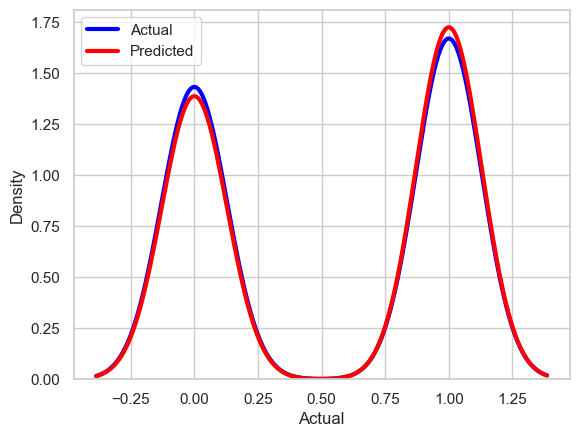

In [107]:
sns.kdeplot(data=dft, x='Actual', color='blue', linewidth=3, label='Actual')
sns.kdeplot(data=dft, x='Predicted', color='red', linewidth=3, label='Predicted')

# Show the legend
plt.legend()

# Show the plot
plt.show()

# 
The blue shows the distribution count foractual values and the red line shows the distribution count for predicted values. The predicted values is close the actual values and ther curve coincides with the actual values curve. This shows that the model is a good fit.

# Random Forest Classifier

In [108]:
from sklearn.ensemble import RandomForestClassifier

In [109]:
from sklearn.model_selection import train_test_split

X_train, X_test, train_labels, test_labels = train_test_split(X, y, test_size=.30,random_state=1,stratify = y)


In [110]:
X_train.head(10)

,SeniorCitizen,MonthlyCharges,TotalCharges,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,PhoneService_No,...,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,tenure_group_1 - 12,tenure_group_13 - 24,tenure_group_25 - 36,tenure_group_37 - 48,tenure_group_49 - 60,tenure_group_61 - 72
714,0,110.45,8058.85,1,0,0,1,0,1,0,...,1,0,0,0,0,0,0,0,0,1
3234,0,75.50,75.50,0,1,1,0,1,0,0,...,0,0,1,0,1,0,0,0,0,0
3229,0,79.00,522.95,1,0,1,0,1,0,0,...,0,0,1,0,1,0,0,0,0,0
4189,0,87.35,4473.00,0,1,1,0,1,0,0,...,0,0,1,0,0,0,0,0,1,0
2751,0,19.25,855.10,0,1,0,1,1,0,0,...,0,0,0,1,0,0,0,1,0,0
4572,0,20.20,1376.50,0,1,0,1,0,1,0,...,1,0,0,0,0,0,0,0,0,1
565,0,84.10,4348.65,0,1,0,1,1,0,0,...,0,0,1,0,0,0,0,0,1,0
357,0,19.80,1378.75,1,0,0,1,0,1,0,...,1,0,0,0,0,0,0,0,0,1
1696,0,84.50,84.50,0,1,1,0,1,0,0,...,0,0,1,0,1,0,0,0,0,0
1378,1,74.30,940.35,1,0,1,0,1,0,0,...,0,0,1,0,0,1,0,0,0,0


In [111]:
train_labels.value_counts()

0    2716
1     981
Name: Churn, dtype: int64

In [112]:
train_labels.value_counts(normalize=True)

0    0.73465
1    0.26535
Name: Churn, dtype: float64

In [113]:
test_labels.value_counts()

0    1164
1     421
Name: Churn, dtype: int64

In [114]:
test_labels.value_counts(normalize=True)

0    0.734385
1    0.265615
Name: Churn, dtype: float64

In [ ]:
# Observations are almost equally distributed between the train and test sets w.r.t target classes

# Ensemble RandomForest Classifier

#
**Importance of Random State**

**The important thing is that everytime you use any natural number, you will always get the same output the first time you make the model which is similar to random state while train test split**

In [115]:
# To understand the differences of different random states affecting Out-of-Bag score
random_state=[7,23,99]
for i in random_state:
    rf=RandomForestClassifier(random_state=i,oob_score=True)
    rf.fit(X_train,train_labels)
    print(rf.oob_score_)

0.7863132269407628
0.7879361644576683
0.7836083310792534


In [116]:
# Build a RandomForestCassifier wit n_estimators 100, max_features 6, andfit it on the training data
rfcl = RandomForestClassifier(n_estimators = 100,max_features=6,random_state=0)
rfcl = rfcl.fit(X_train, train_labels)

In [117]:
rfcl

RandomForestClassifier(max_features=6, random_state=0)

#### Predicting Train and Test data with the RF Model 

In [118]:
ytrain_predict = rfcl.predict(X_train)
ytest_predict = rfcl.predict(X_test)

### Evaluating model performance with confusion matrix 

In [119]:
from sklearn.metrics import confusion_matrix,classification_report

### Evaluating model performance on the training data 

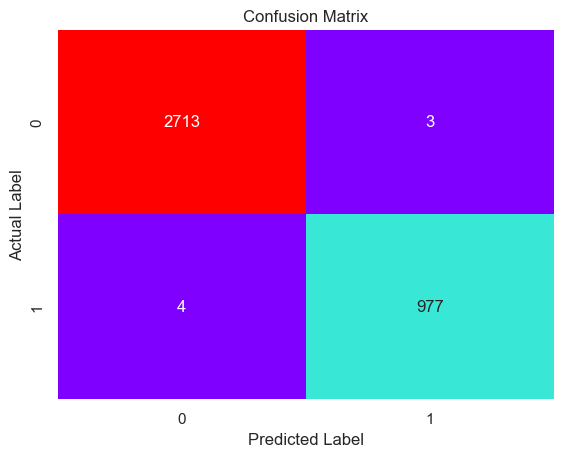

In [120]:
# Get the confusion matrix on the train data
confusion_matrix(train_labels,ytrain_predict)
sns.heatmap(confusion_matrix(train_labels,ytrain_predict),annot=True, fmt='d',cbar=False, cmap='rainbow')
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.title('Confusion Matrix')
plt.show()

In [121]:
print(classification_report(train_labels,ytrain_predict))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2716
           1       1.00      1.00      1.00       981

    accuracy                           1.00      3697
   macro avg       1.00      1.00      1.00      3697
weighted avg       1.00      1.00      1.00      3697



In [122]:
print('Accuracy', ((2424+414)/(2424+414)))
print('Sensitivity',((414/414))) #TP/Actual yes
print('Specificity',(2424/2424)) #TN/Actual no
print('Precision',(414/414)) #TP/Predicted yes

Accuracy 1.0
Sensitivity 1.0
Specificity 1.0
Precision 1.0


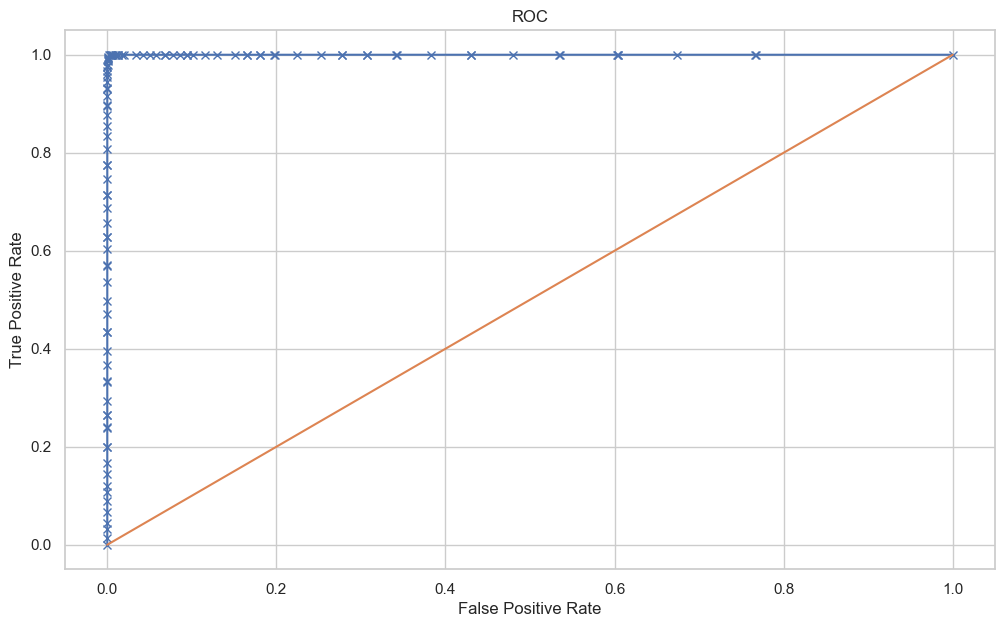

Area under Curve is 0.999983861257861


In [123]:
from sklearn.metrics import roc_curve,roc_auc_score
rf_fpr, rf_tpr,_=roc_curve(train_labels,rfcl.predict_proba(X_train)[:,1])
plt.figure(figsize=(12,7))
plt.plot(rf_fpr,rf_tpr, marker='x', label='Random Forest')
plt.plot(np.arange(0,1.1,0.1),np.arange(0,1.1,0.1))
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.show()
print('Area under Curve is', roc_auc_score(train_labels,rfcl.predict_proba(X_train)[:,1]))

### Evaluating model performance on the test data

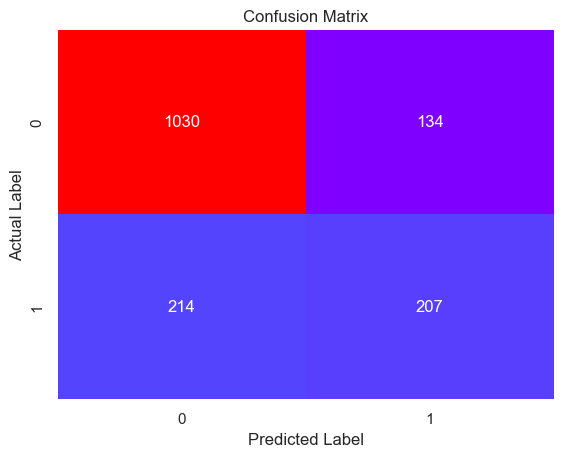

In [124]:
confusion_matrix(test_labels,ytest_predict)
sns.heatmap(confusion_matrix(test_labels,ytest_predict),annot=True, fmt='d',cbar=False, cmap='rainbow')
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.title('Confusion Matrix')
plt.show()

In [125]:
print(classification_report(test_labels,ytest_predict))

              precision    recall  f1-score   support

           0       0.83      0.88      0.86      1164
           1       0.61      0.49      0.54       421

    accuracy                           0.78      1585
   macro avg       0.72      0.69      0.70      1585
weighted avg       0.77      0.78      0.77      1585



In [126]:
print('Accuracy', ((1019+13)/(1019+3+182+13)))
print('Sensitivity',((13/(13+182)))) 
print('Specificity',(1019/(1019+3)))
print('Precision',(13/(13+3)))

Accuracy 0.847986852917009
Sensitivity 0.06666666666666667
Specificity 0.99706457925636
Precision 0.8125


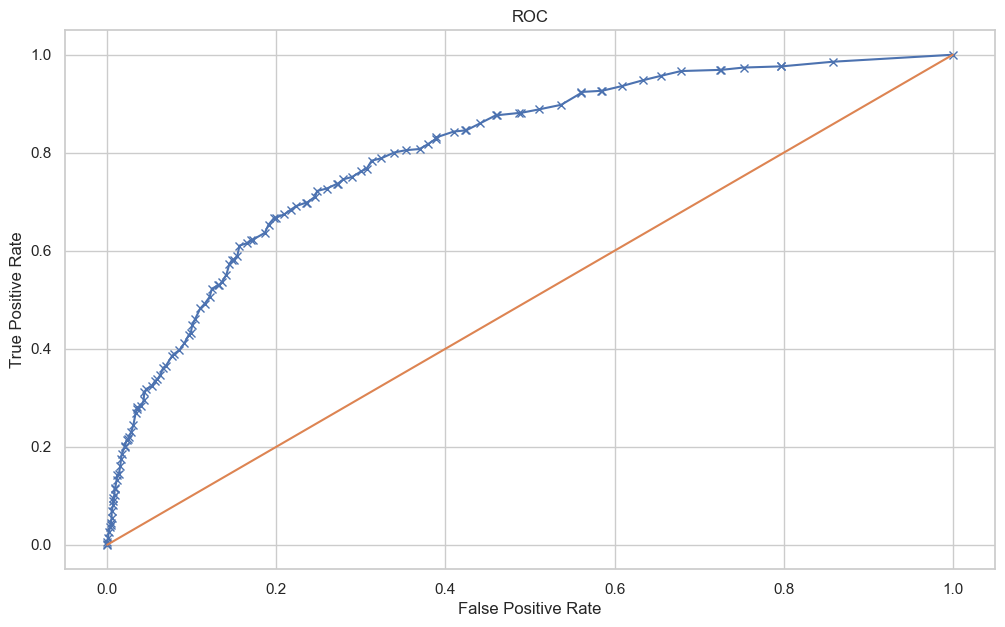

Area under Curve is 0.6882830929467558


In [127]:
#from sklearn.metrics import roc_curve,roc_auc_score
rf_fpr, rf_tpr,_=roc_curve(test_labels,rfcl.predict_proba(X_test)[:,1])
plt.figure(figsize=(12,7))
plt.plot(rf_fpr,rf_tpr, marker='x', label='Random Forest')
plt.plot(np.arange(0,1.1,0.1),np.arange(0,1.1,0.1))
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.show()
print('Area under Curve is', roc_auc_score(test_labels,rfcl.predict(X_test)))

# Result:

Area under the curve on the training data is almost 100%, which indicates very high performance that all classes have been correctly classified. Whereas on the test data model performance is average with AUC 69%, which is almost half or slightly more than half the performance of the training data.  
  

Since we are building a model to predict telecom custmoer churn, for practical purposes, we will be more interested in correctly classifying 0 (No churn) than 1( churn).so that we can take corrective action on immadiated basis 

From the Random Forest model,looking at the Accuracy,Sensitivity,Speficity,Recall and AUC, we have almost 100% results on the training data, whereas on the Test data, performance is lesser,especially in predicting Class 1.  
 
This is because overfitting has happened on the training data, and therefore the model is weak in generalizing and predicting any new data.

In this model, we have hard-coded the hyper parameter values. We can optimize/fine-tune the random forest model, by trying different values for the hyper parameters to see if the model performance is improving.

### Grid Search for finding out the optimal values for the hyper parameters 

In [128]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'max_depth': [5,7,10],
    'max_features': [4,6],
    'min_samples_leaf': [5,10],
    'min_samples_split': [50,100],
    'n_estimators': [100,200,300]
}

rfcl = RandomForestClassifier()

grid_search = GridSearchCV(estimator = rfcl, param_grid = param_grid, cv = 10)

In [129]:
grid_search.fit(X_train, train_labels)

GridSearchCV(cv=10, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [5, 7, 10], 'max_features': [4, 6],
                         'min_samples_leaf': [5, 10],
                         'min_samples_split': [50, 100],
                         'n_estimators': [100, 200, 300]})

In [130]:
grid_search.best_params_

{'max_depth': 10,
 'max_features': 6,
 'min_samples_leaf': 10,
 'min_samples_split': 50,
 'n_estimators': 300}

In [131]:
best_grid = grid_search.best_estimator_

In [132]:
best_grid

RandomForestClassifier(max_depth=10, max_features=6, min_samples_leaf=10,
                       min_samples_split=50, n_estimators=300)

In [133]:
ytrain_predict = best_grid.predict(X_train)
ytest_predict = best_grid.predict(X_test)

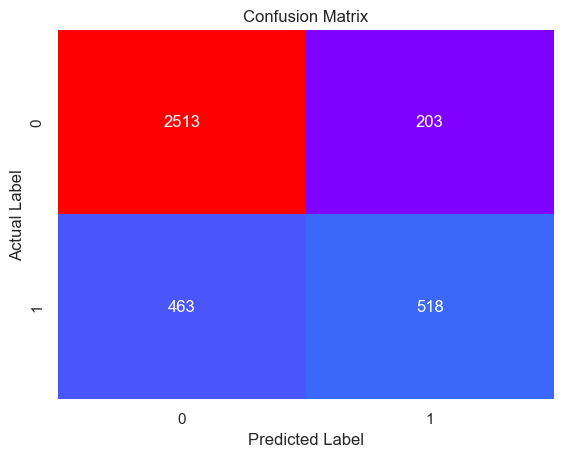

In [134]:
confusion_matrix(train_labels,ytrain_predict)
sns.heatmap(confusion_matrix(train_labels,ytrain_predict),annot=True, fmt='d',cbar=False, cmap='rainbow')
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.title('Confusion Matrix')
plt.show()

In [135]:
print(classification_report(train_labels,ytrain_predict))

              precision    recall  f1-score   support

           0       0.84      0.93      0.88      2716
           1       0.72      0.53      0.61       981

    accuracy                           0.82      3697
   macro avg       0.78      0.73      0.75      3697
weighted avg       0.81      0.82      0.81      3697



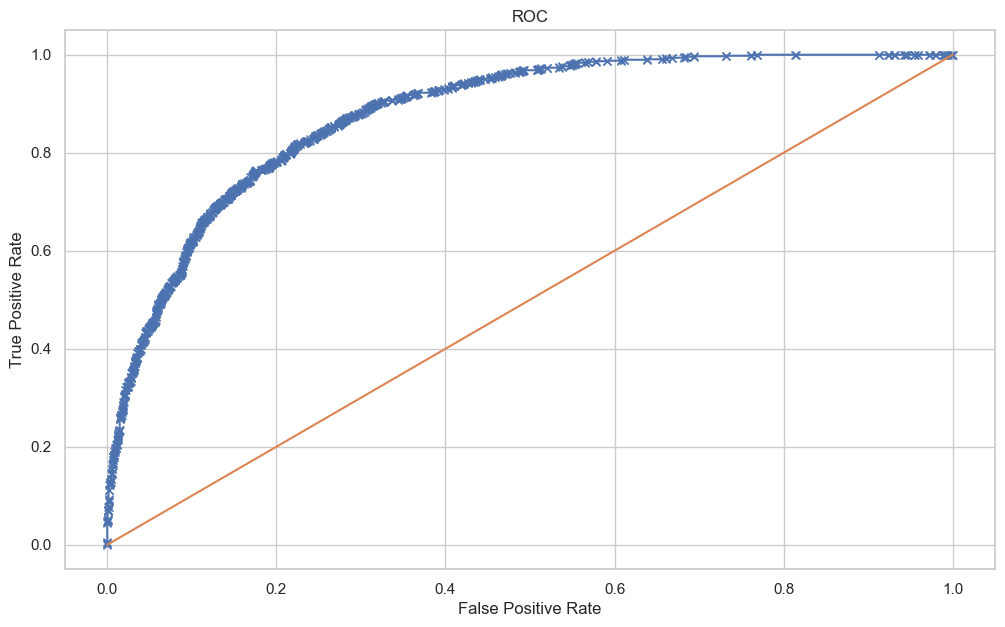

Area under Curve is 0.726645175867251


In [136]:
#from sklearn.metrics import roc_curve,roc_auc_score
rf_fpr, rf_tpr,_=roc_curve(train_labels,best_grid.predict_proba(X_train)[:,1])
plt.figure(figsize=(12,7))
plt.plot(rf_fpr,rf_tpr, marker='x', label='Random Forest')
plt.plot(np.arange(0,1.1,0.1),np.arange(0,1.1,0.1))
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.show()
print('Area under Curve is', roc_auc_score(train_labels,best_grid.predict(X_train)))

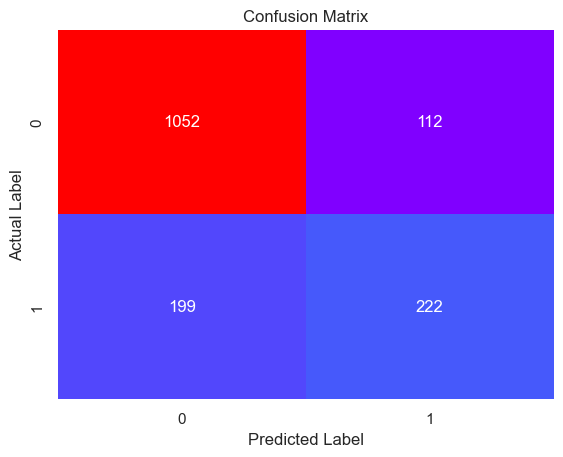

In [137]:
confusion_matrix(test_labels,ytest_predict)
sns.heatmap(confusion_matrix(test_labels,ytest_predict),annot=True, fmt='d',cbar=False, cmap='rainbow')
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.title('Confusion Matrix')
plt.show()

In [138]:
print(classification_report(test_labels,ytest_predict))

              precision    recall  f1-score   support

           0       0.84      0.90      0.87      1164
           1       0.66      0.53      0.59       421

    accuracy                           0.80      1585
   macro avg       0.75      0.72      0.73      1585
weighted avg       0.79      0.80      0.80      1585



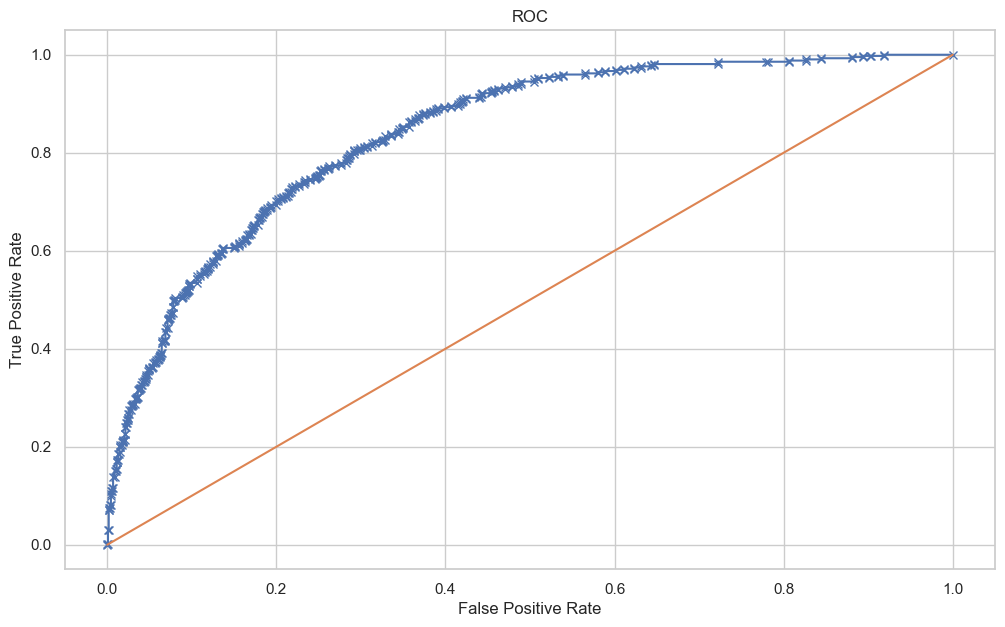

Area under Curve is 0.7155479916089168


In [139]:
#from sklearn.metrics import roc_curve,roc_auc_score
rf_fpr, rf_tpr,_=roc_curve(test_labels,best_grid.predict_proba(X_test)[:,1])
plt.figure(figsize=(12,7))
plt.plot(rf_fpr,rf_tpr, marker='x', label='Random Forest')
plt.plot(np.arange(0,1.1,0.1),np.arange(0,1.1,0.1))
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.show()
print('Area under Curve is', roc_auc_score(test_labels,best_grid.predict(X_test)))

# Final Conclusion:

Here, we can see that even when we try other values for the hyper parameters, the model performance is not improving much. 

AUC is almost 72% in both the cases. The problem of overfitting is mildly addressed, as the results are almost same between the train and test set. But still, the model is highly use  in predicting class 0, and not class 1 (performance is lesser)

This is because, the dataset is unbalanced, and so we have a class imbalance problem.